In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
import pandas as pd

###Original Data
2015 data extracted from a PDF of historical world records from the IAAF:

http://iaaf-ebooks.s3.amazonaws.com/2015/Beijing-2015-Statistics-Handbook/index.htm

In [7]:
dn = '2015worldrecords/'
fns = ['100m.txt','200m.txt','400m.txt','800m.txt','1000m.txt','1500m.txt','mile.txt',
            '2000m.txt','3000m.txt','5000m.txt','10km.txt','20km.txt','halfmarathon.txt','25km.txt','marathon.txt',
      '100mf.txt','200mf.txt','400mf.txt','800mf.txt','1000mf.txt','1500mf.txt','milef.txt',
            '2000mf.txt','3000mf.txt','5000mf.txt','10kmf.txt','20kmf.txt','halfmarathonf.txt','25kmf.txt','marathonf.txt']

In [8]:
distance = array([100.,200.,400.,800.,1000.,1500.,1609.34,2000.,3000.,5000.,1.e4,2.e4,21097.5,2.5e4,2*21097.5,
                  100.,200.,400.,800.,1000.,1500.,1609.34,2000.,3000.,5000.,1.e4,2.e4,21097.5,2.5e4,2*21097.5])

In [9]:
Ndistance = array(['100 m','200 m','400 m','800 m','1000 m','1500 m','Mile','2000 m',
                   '3000 m','5000 m','10 km','20 km','Half\nMarathon','25 km','Marathon'])

In [10]:
dd = distance

In [11]:
dd

array([   100.  ,    200.  ,    400.  ,    800.  ,   1000.  ,   1500.  ,
         1609.34,   2000.  ,   3000.  ,   5000.  ,  10000.  ,  20000.  ,
        21097.5 ,  25000.  ,  42195.  ,    100.  ,    200.  ,    400.  ,
          800.  ,   1000.  ,   1500.  ,   1609.34,   2000.  ,   3000.  ,
         5000.  ,  10000.  ,  20000.  ,  21097.5 ,  25000.  ,  42195.  ])

In [12]:
len(distance)

30

In [13]:
gender = []
for i in arange(len(distance)/2.):
    gender.append('m')
for i in arange(len(distance)/2.):
    gender.append('f')
    
    

In [14]:
df2 = pd.DataFrame(columns=('Distance','Gender','Time', 'Name', 'Date', 'Year') )
for i in arange(len(fns)):
    print i, fns[i]
    lines = [line.rstrip('\n').replace('y .','.').replace('+ .','.').replace('+.','.').replace('y.','.').replace('. ','!').split('!') for line in open(dn+fns[i])]
    ind = len(lines)
    df = pd.DataFrame(index=np.arange(0, ind), columns=('Distance','Gender','Time', 'Name', 'Date', 'Year') )

    for j in arange(len(lines)):
        vals = pd.unique(lines[j])
        #print j, len(vals),vals
        try:
            df.loc[j]["Time"] = float(vals[0])
        except:
            vv = vals[0].split(':')
            v0 = 0
            for k in arange(len(vv)):
                try:
                    v0 = v0+60**k*float(vv[-k-1])
                except:
                    print "badtime",i,j,vv
            df.loc[j]["Time"] = v0
        try:
            df.loc[j]["Date"] = pd.Timestamp(vals[-1])
        except:
            print "badyear", i, j, vals[-1], vals
        yr= pd.Timestamp(vals[-1]).year + pd.Timestamp(vals[-1]).month/12.
        if((j<8) and (yr > 1975) and (gender[i]=='m')):
            if( ((i==10)==False) and ((i==12)==False)):
                yr = yr - 100
                    
        if((yr>2016)):
            yr = yr - 100
        #if(j < 10):
        try:
            df.loc[j]["Year"] = float(yr)
            df.loc[j]["Name"] = vals[-4]
            df.loc[j]["Distance"] = distance[i]
            df.loc[j]["Gender"] = gender[i]
        except:
            print "bad",i,fns[i],j,vals
    df.to_csv(dn+fns[i]+'.csv')
    df2 = df2.append(df,ignore_index=True)

0 100m.txt
1 200m.txt
2 400m.txt
3 800m.txt
4 1000m.txt
5 1500m.txt
6 mile.txt
7 2000m.txt
8 3000m.txt
9 5000m.txt
10 10km.txt
11 20km.txt
12 halfmarathon.txt
13 25km.txt
14 marathon.txt
15 100mf.txt
16 200mf.txt
17 400mf.txt
18 800mf.txt
19 1000mf.txt
20 1500mf.txt
21 milef.txt
22 2000mf.txt
23 3000mf.txt
24 5000mf.txt
25 10kmf.txt
26 20kmf.txt
27 halfmarathonf.txt
28 25kmf.txt
29 marathonf.txt


In [15]:
df2.to_csv(dn+'allrecords.csv')

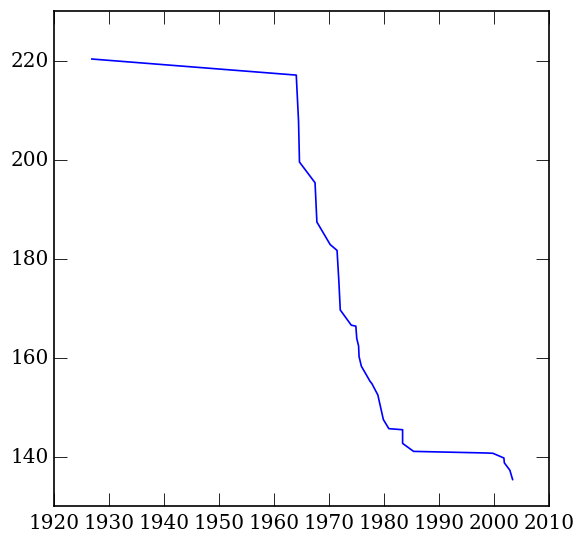

In [16]:
plot(df["Year"],df["Time"]/60)

In [17]:
for i in distance:
   print  i, df2["Year"][df2["Distance"]==i].min(),df2["Year"][df2["Distance"]==i].max()

100.0 1912.58333333 2009.66666667
200.0 1922.66666667 2009.66666667
400.0 1900.75 1999.66666667
800.0 1912.58333333 2012.66666667
1000.0 1913.5 1999.75
1500.0 1912.5 1998.58333333
1609.34 1913.41666667 1999.58333333
2000.0 1918.5 1999.75
3000.0 1912.58333333 1996.75
5000.0 1912.58333333 2008.5
10000.0 1968.0 2010.75
20000.0 1958.66666667 2015.16666667
21097.5 1964.83333333 2015.16666667
25000.0 1947.83333333 2012.41666667
42195.0 1908.58333333 2014.75
100.0 1912.58333333 2009.66666667
200.0 1922.66666667 2009.66666667
400.0 1900.75 1999.66666667
800.0 1912.58333333 2012.66666667
1000.0 1913.5 1999.75
1500.0 1912.5 1998.58333333
1609.34 1913.41666667 1999.58333333
2000.0 1918.5 1999.75
3000.0 1912.58333333 1996.75
5000.0 1912.58333333 2008.5
10000.0 1968.0 2010.75
20000.0 1958.66666667 2015.16666667
21097.5 1964.83333333 2015.16666667
25000.0 1947.83333333 2012.41666667
42195.0 1908.58333333 2014.75


In [18]:
years = arange(1908,2015)

In [19]:
pps = zeros((years.size,distance.size/2))
ppsf = zeros((years.size,distance.size/2))
for i in arange(years.size):
    for j in arange(distance.size/2):
        #print i,j#,df2["Time"][(df2["Distance"]==distance[j])*(df2["Year"]<years[i])][-1]
        try:
            #print years[i], distance[j], df2["Time"][(df2["Distance"]==distance[j])*(df2["Year"]<years[i])].values[-1]
            pps[i,j] = df2["Time"][(df2["Gender"]=='m')*(df2["Distance"]==distance[j])*(df2["Year"]<years[i])].values[-1]/distance[j]*1609.34/60.
            
        except:
            #print "bad"
            pps[i,j] = nan#df2["Time"][(df2["Distance"]==distance[j])].values[0]/distance[j]*1609.34/60.
            #print i,j,"didn't work"#, df2["Time"][(df2["Distance"]==distance[j])*(df2["Year"]<years[i])]
        try:
            #print years[i], distance[j], df2["Time"][(df2["Distance"]==distance[j])*(df2["Year"]<years[i])].values[-1]
            ppsf[i,j] = df2["Time"][(df2["Gender"]=='f')*(df2["Distance"]==distance[j])*(df2["Year"]<years[i])].values[-1]/distance[j]*1609.34/60.
            
        except:
            #print "bad"
            ppsf[i,j] = nan#df2["Time"][(df2["Distance"]==distance[j])].values[0]/distance[j]*1609.34/60.
            #print i,j,"didn't work"#, df2["Time"][(df2["Distance"]==distance[j])*(df2["Year"]<years[i])]
        

/usr/local/lib/python2.7/dist-packages/pandas/computation/expressions.py:181: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))


### The progress of world records through time

/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):
/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


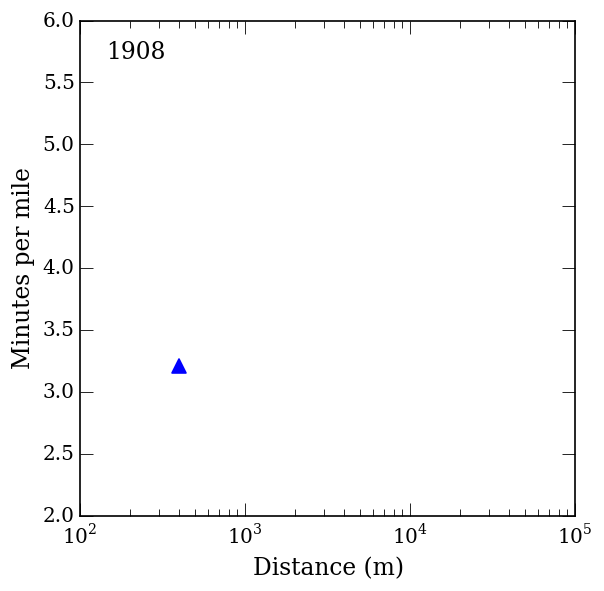

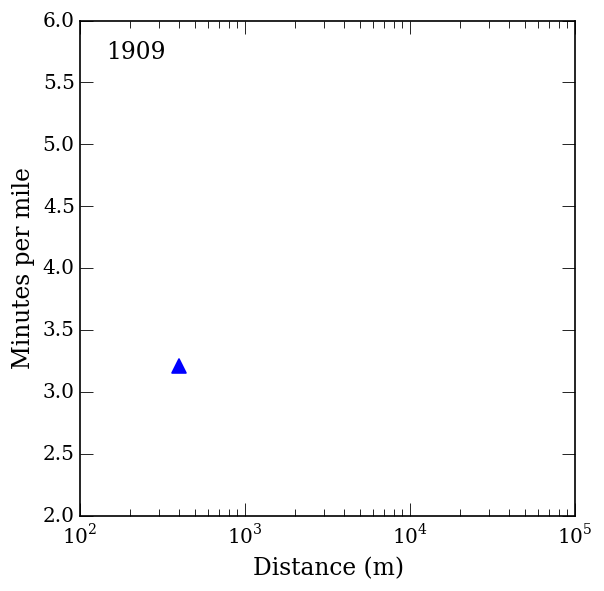

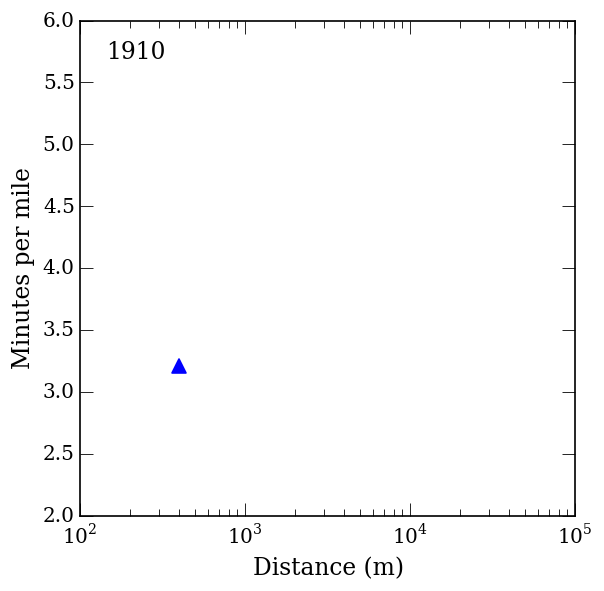

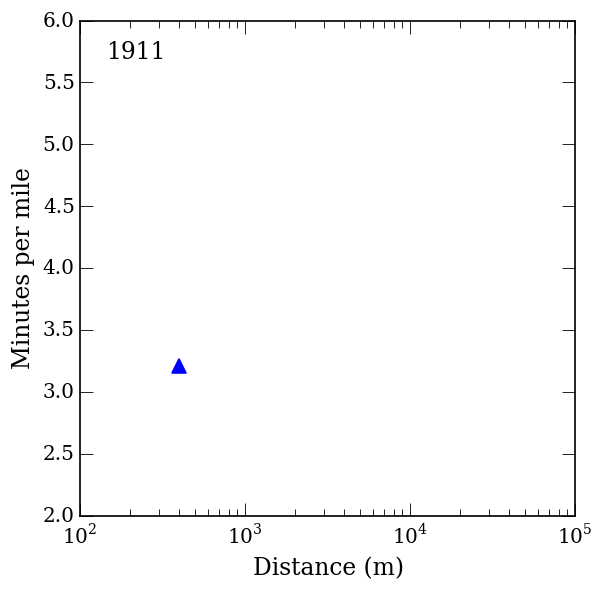

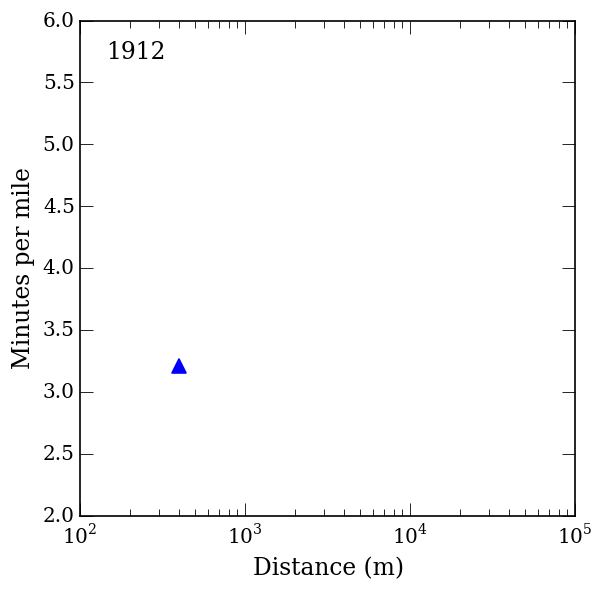

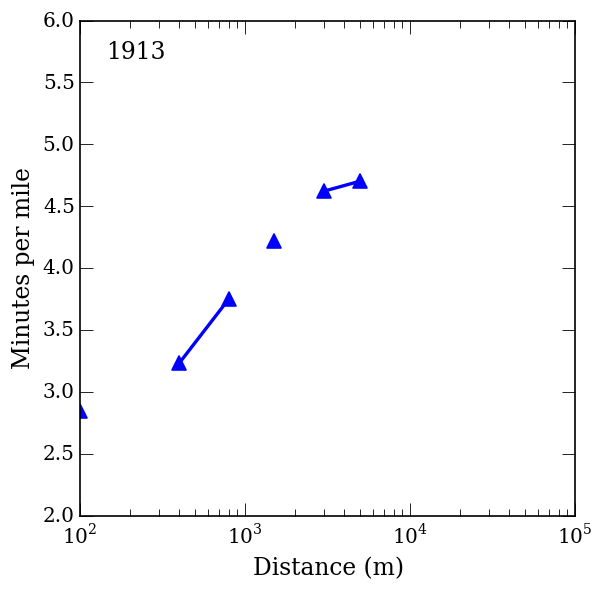

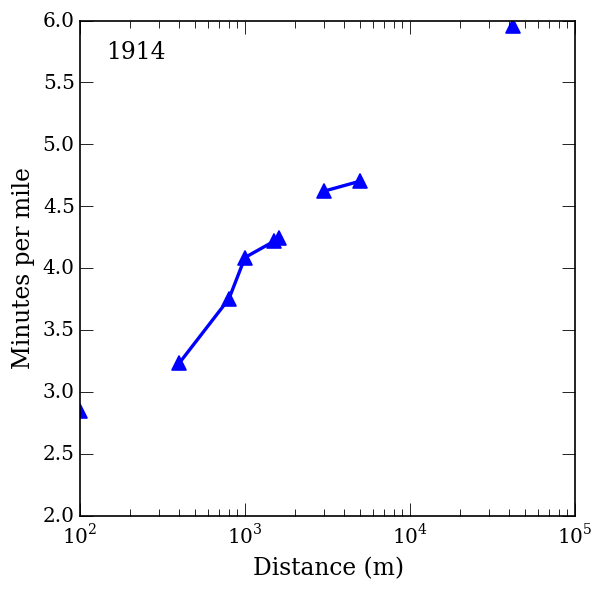

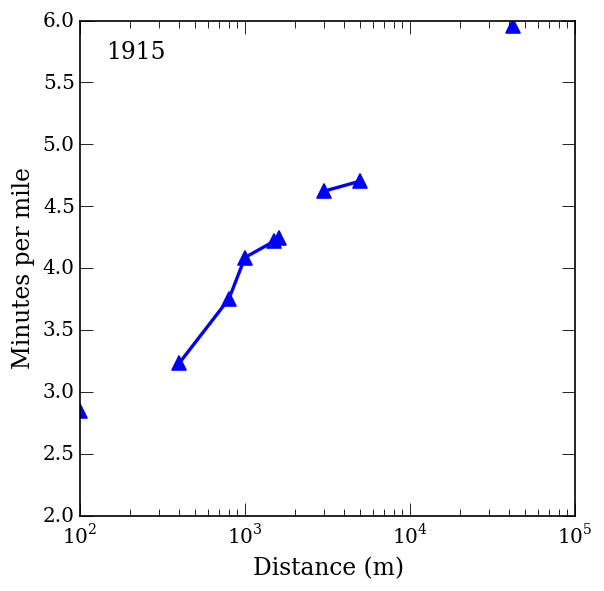

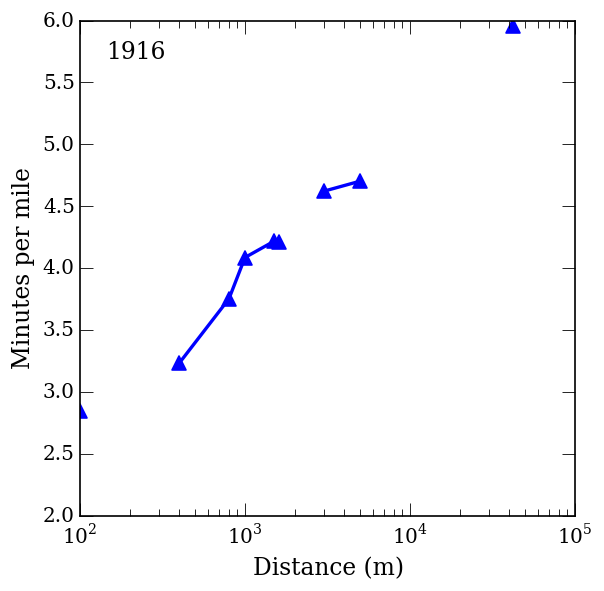

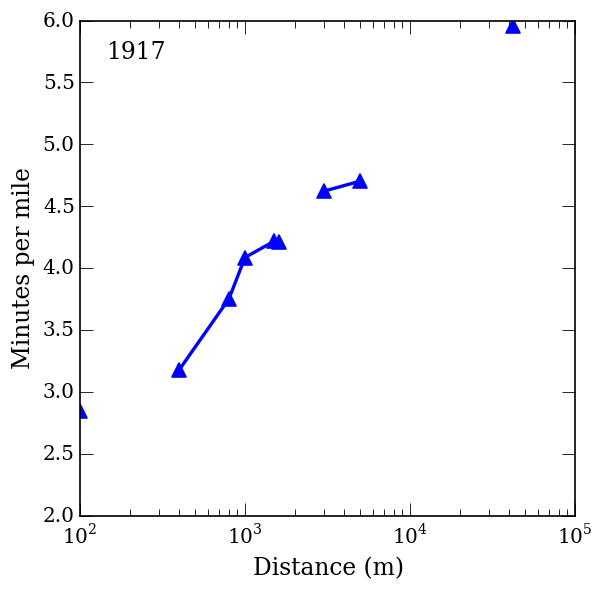

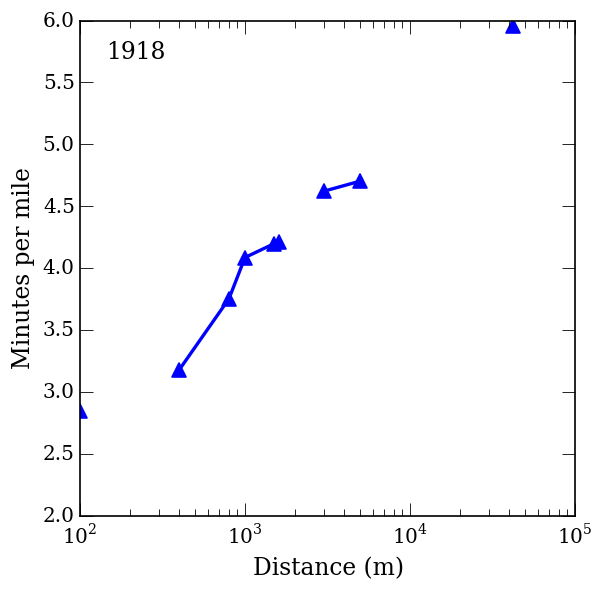

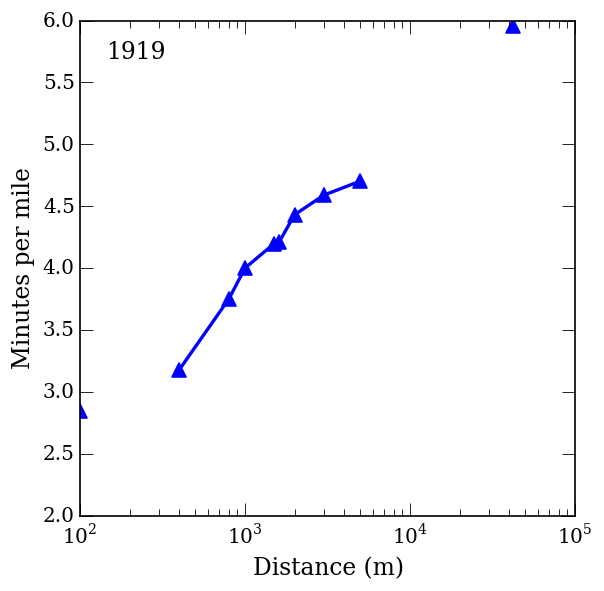

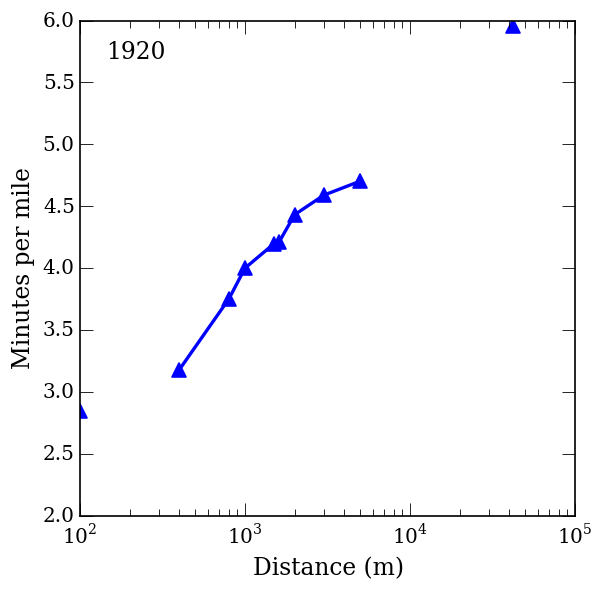

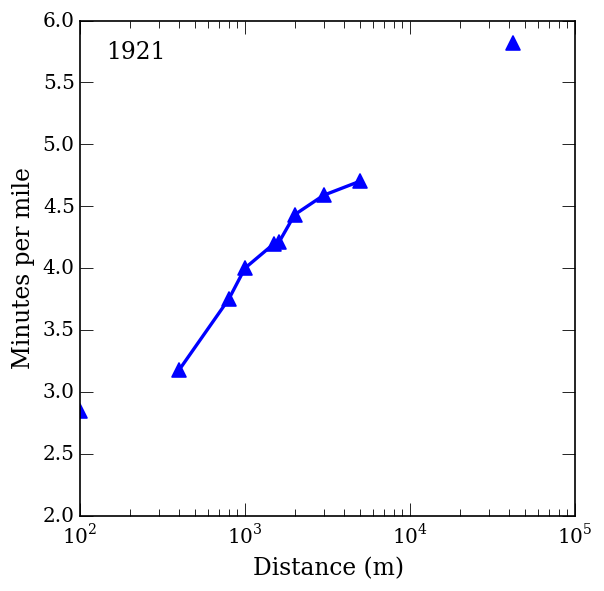

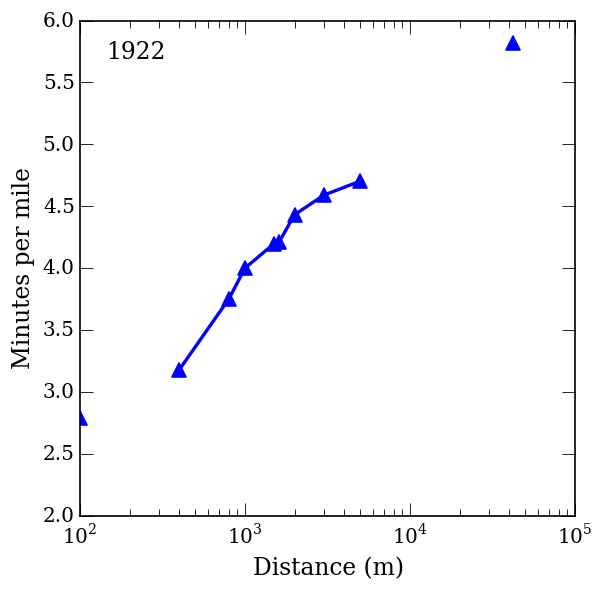

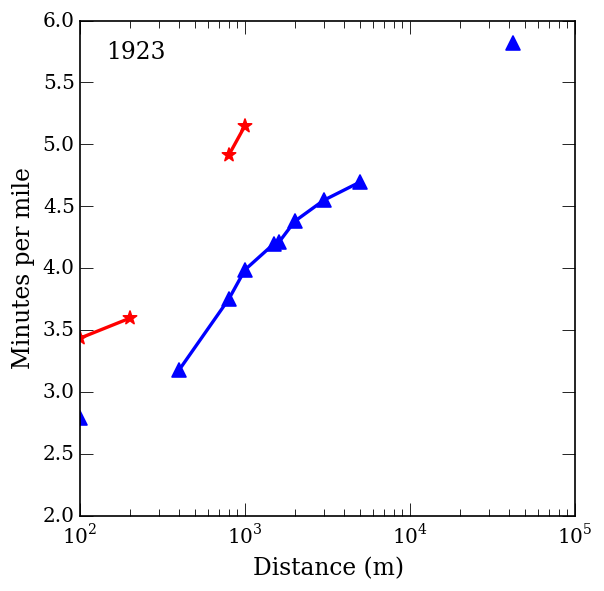

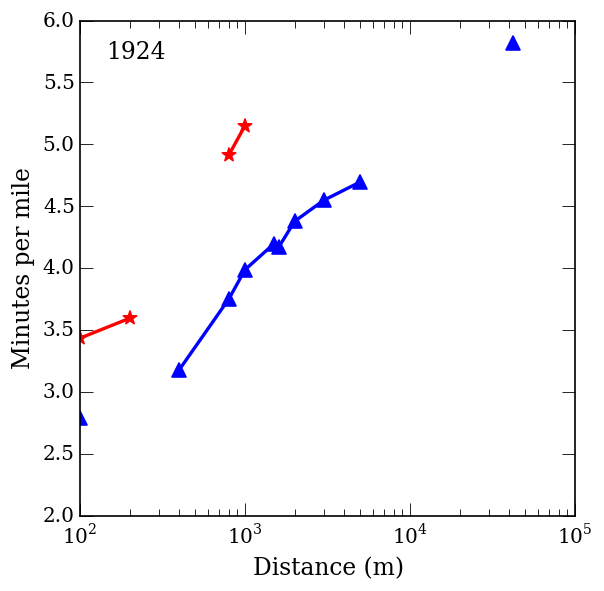

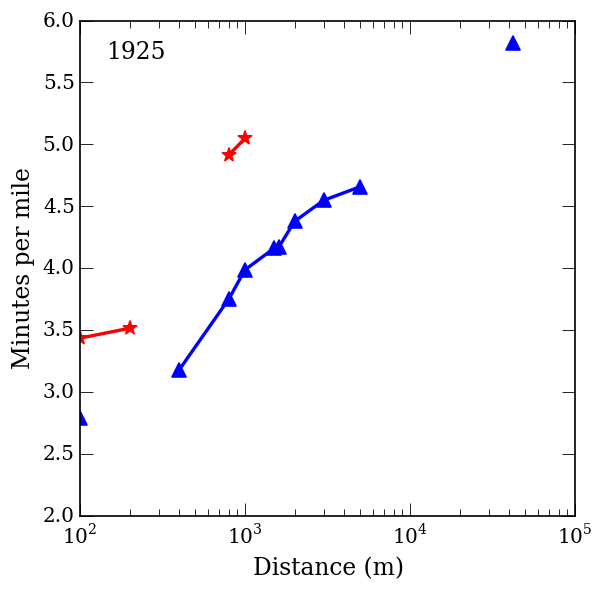

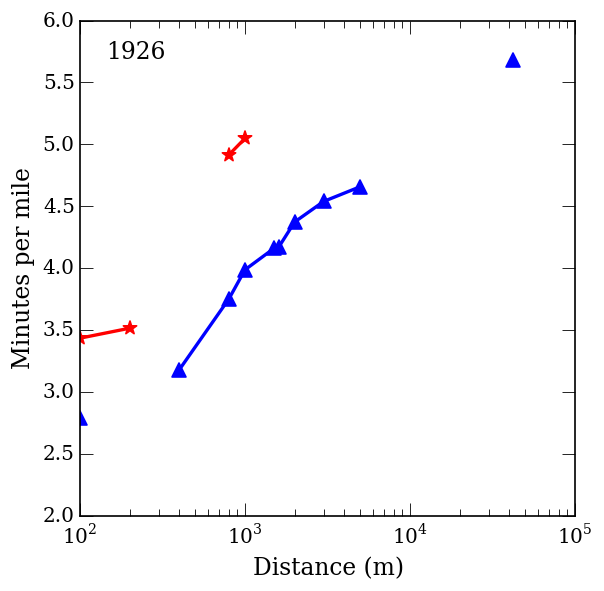

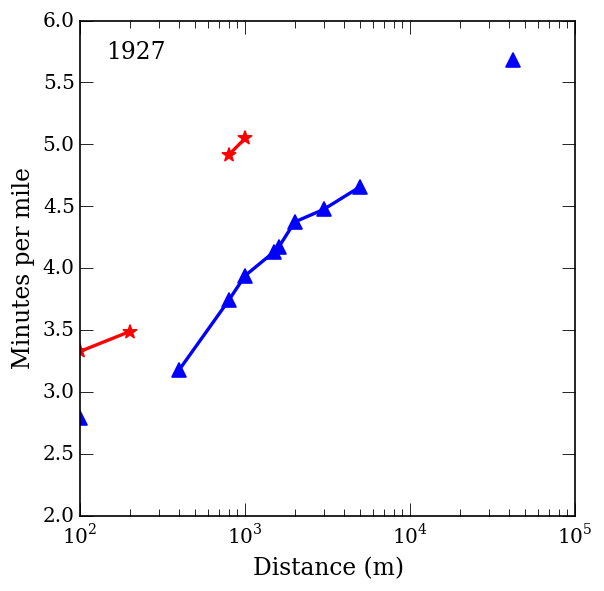

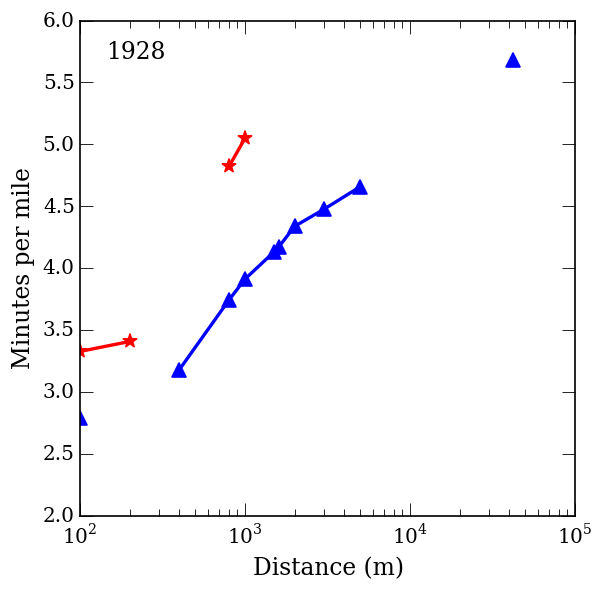

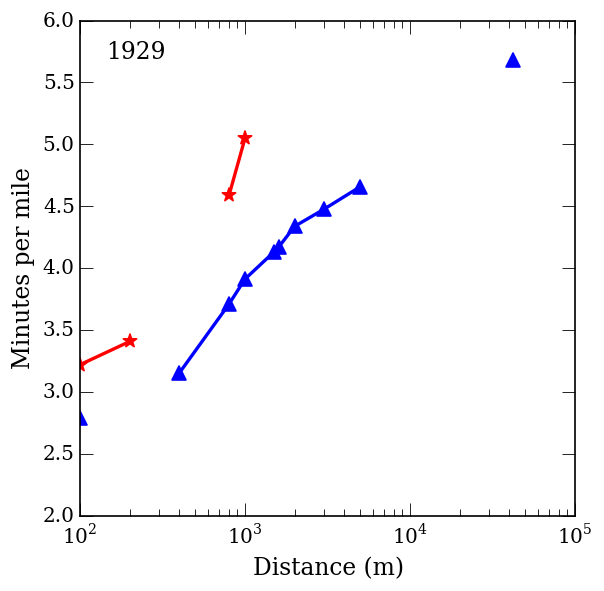

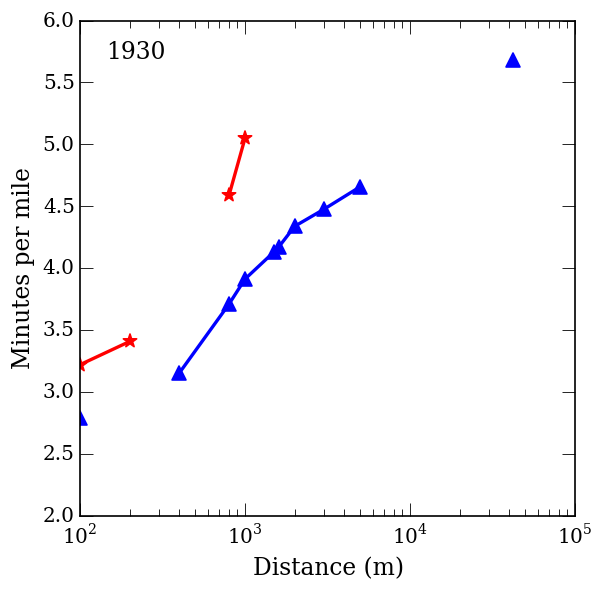

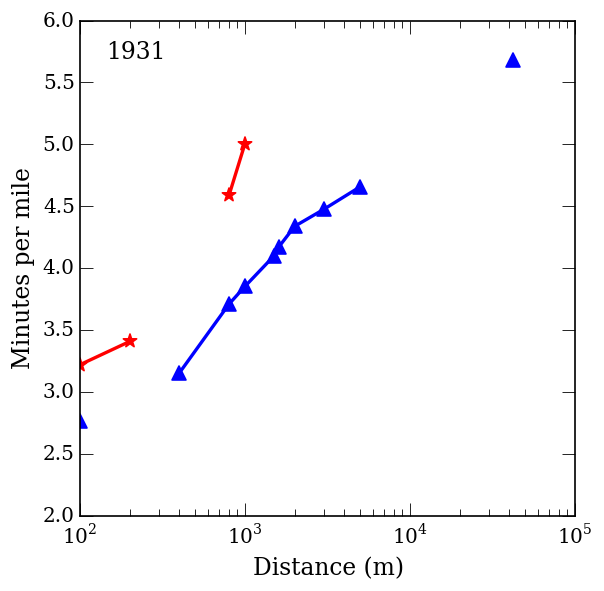

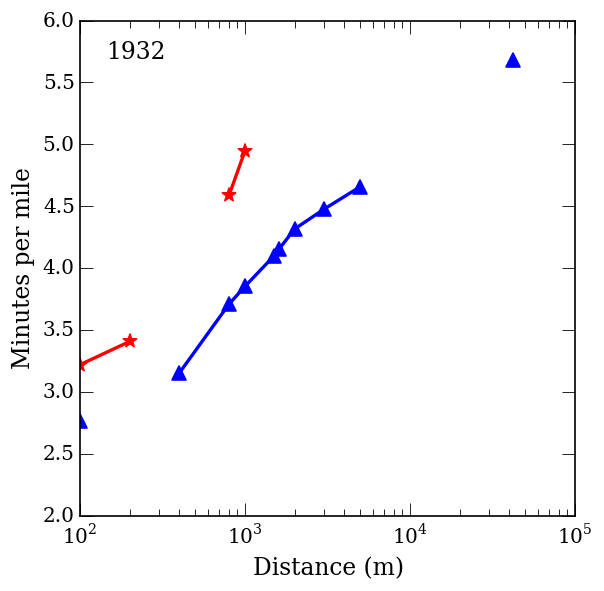

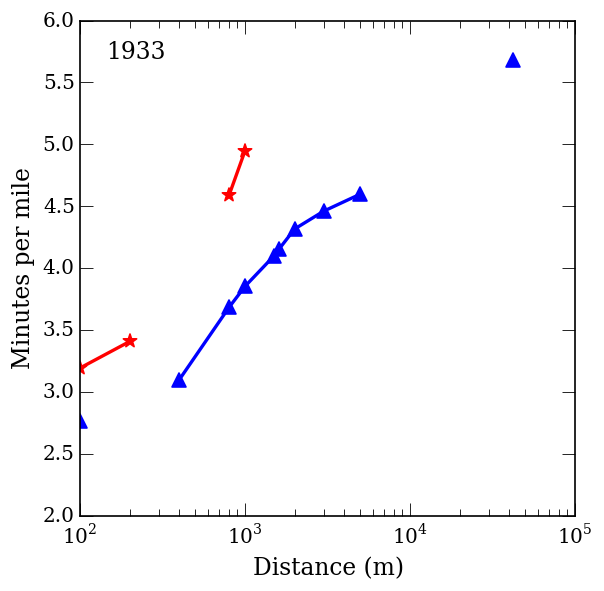

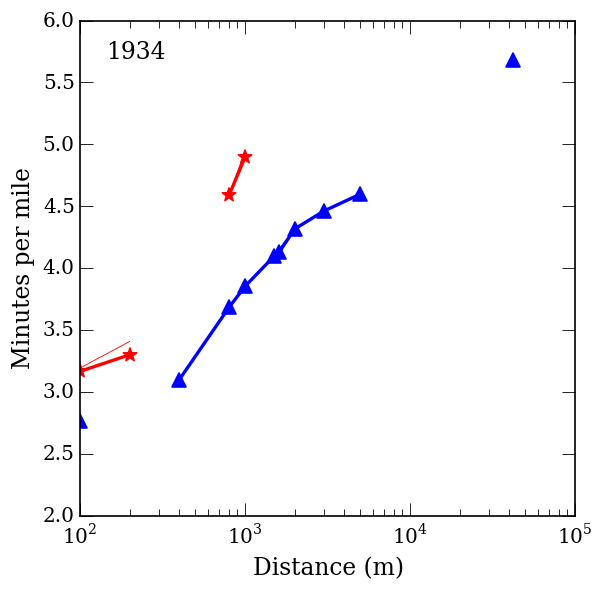

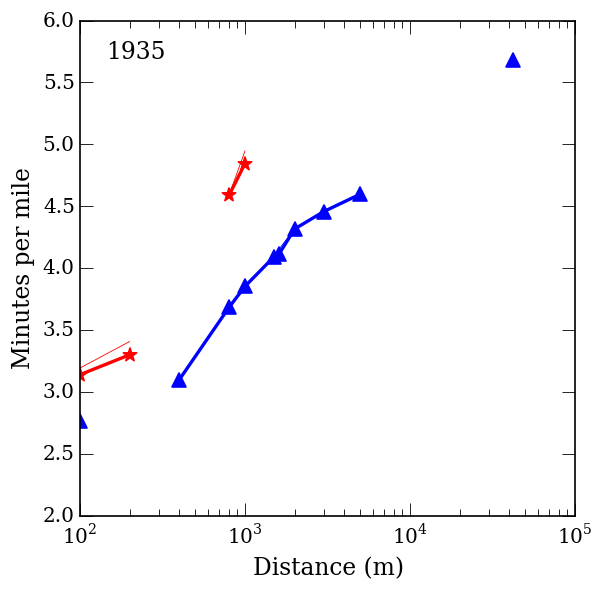

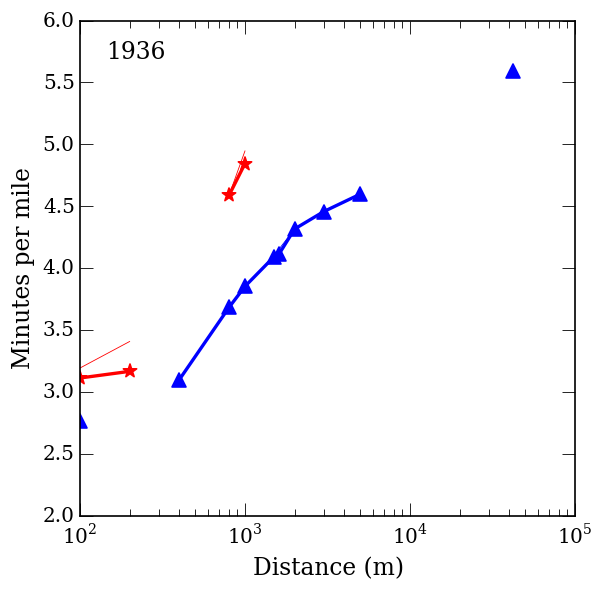

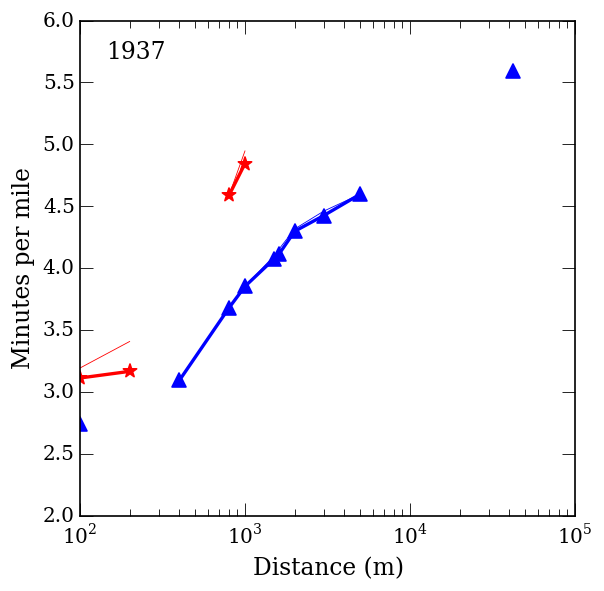

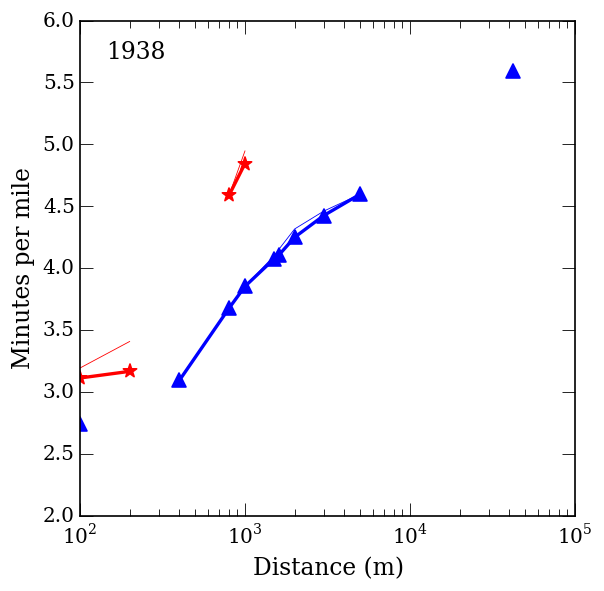

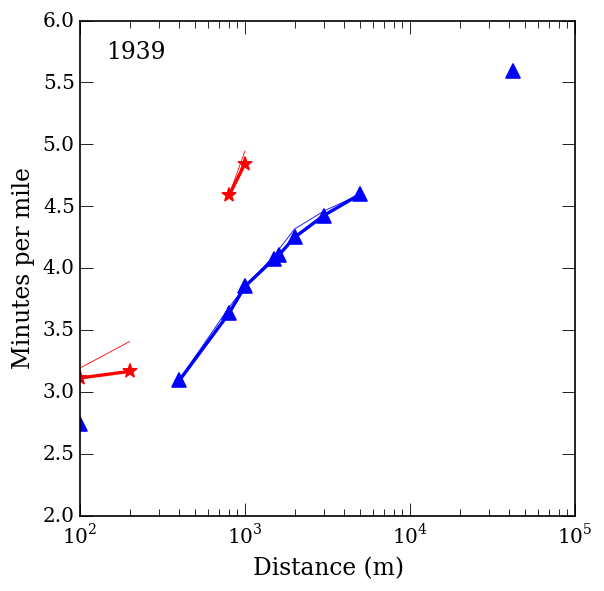

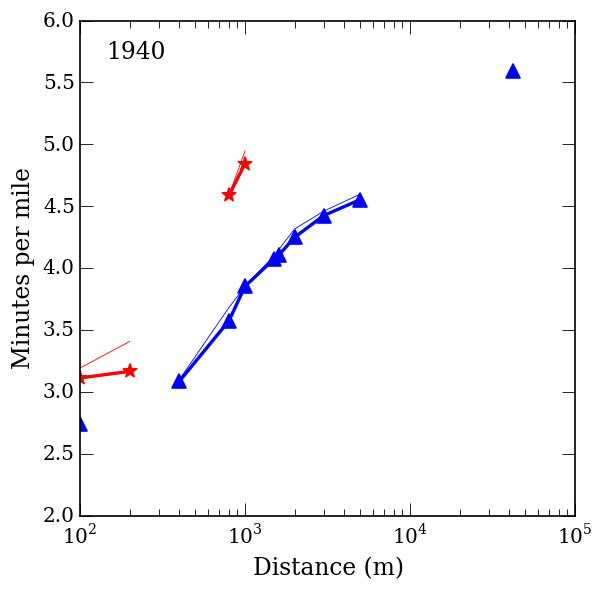

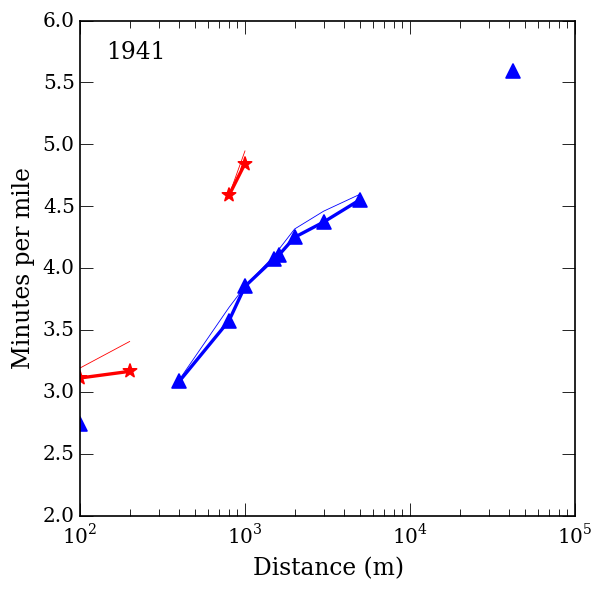

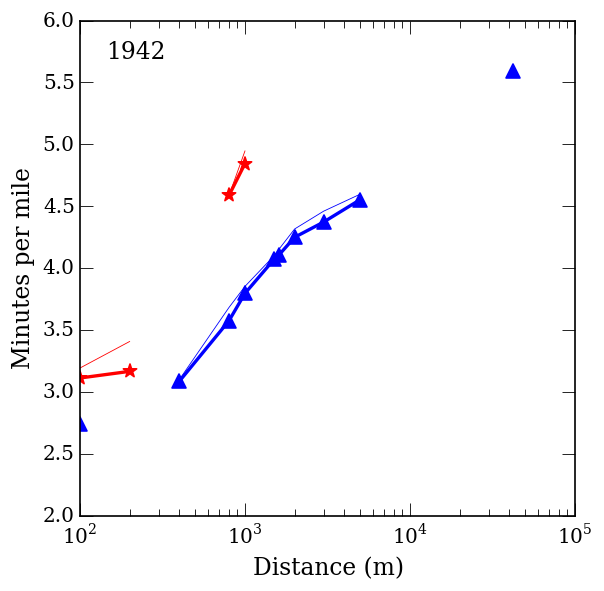

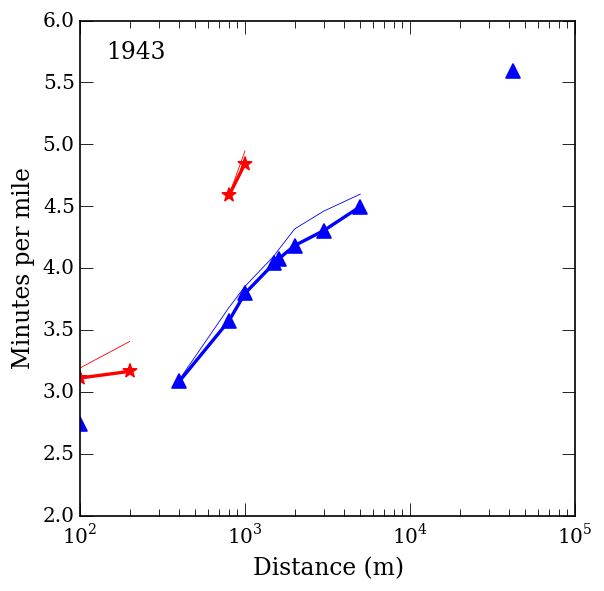

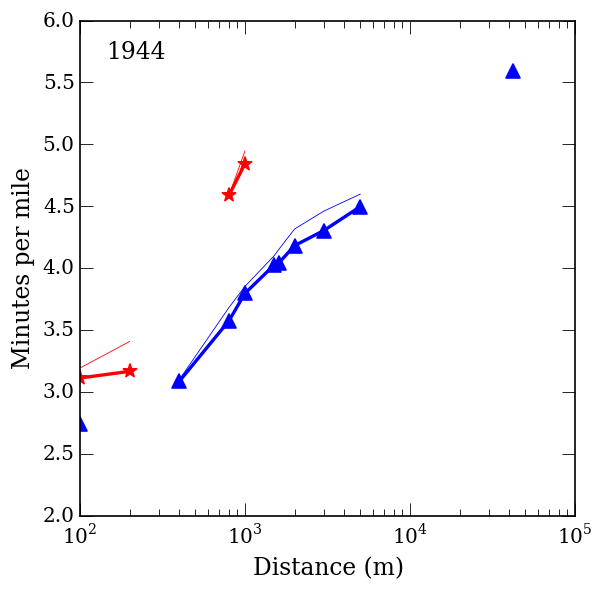

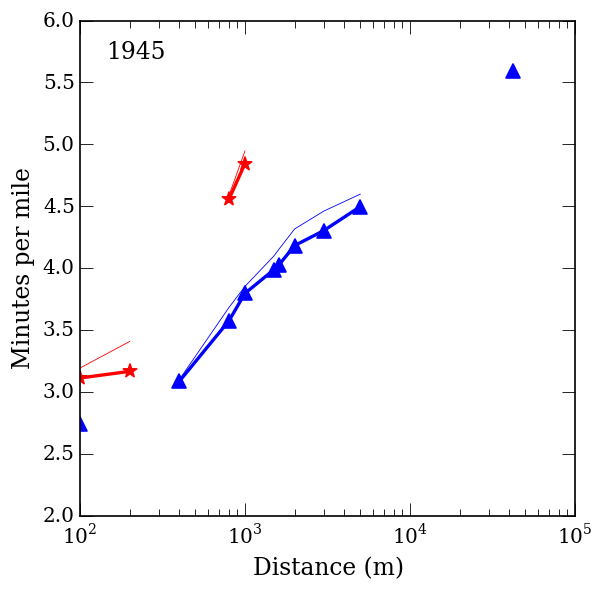

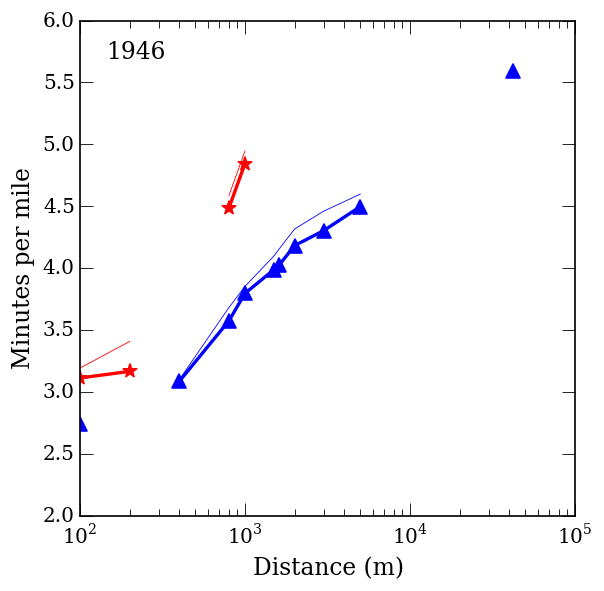

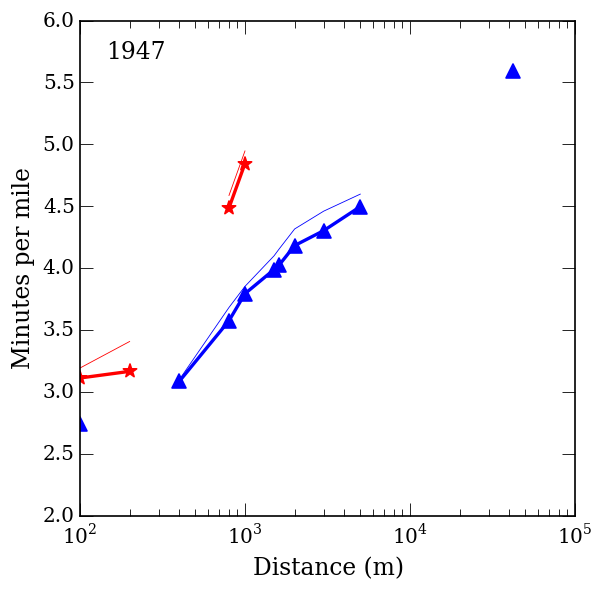

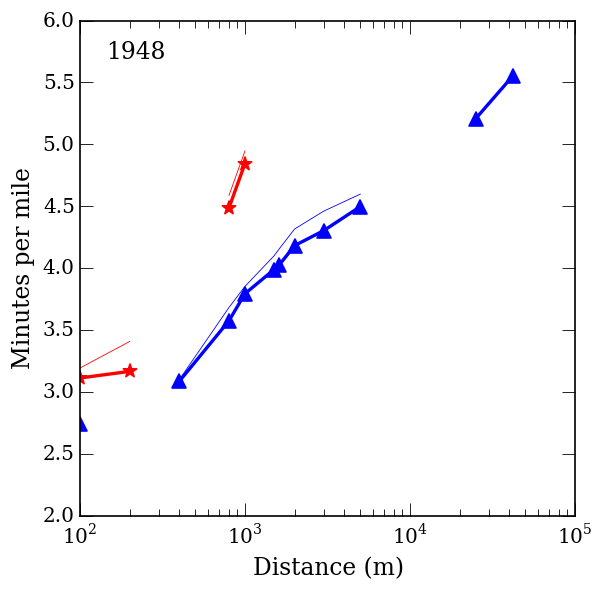

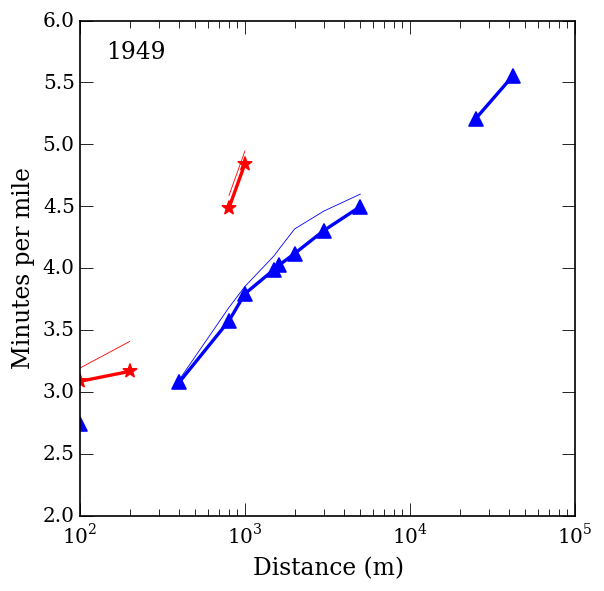

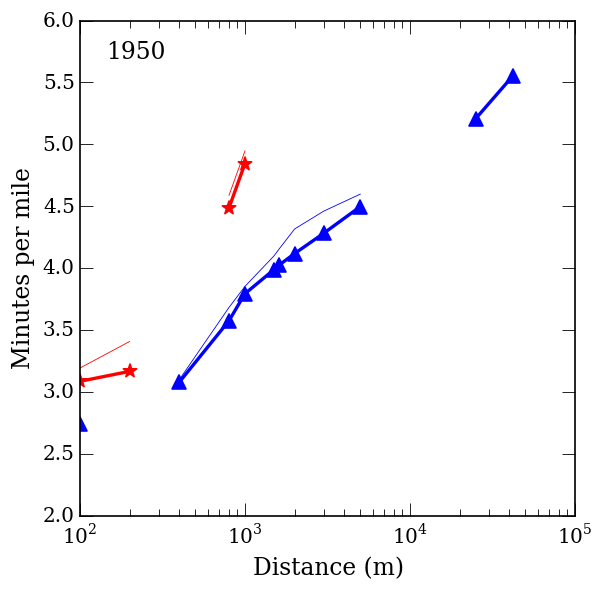

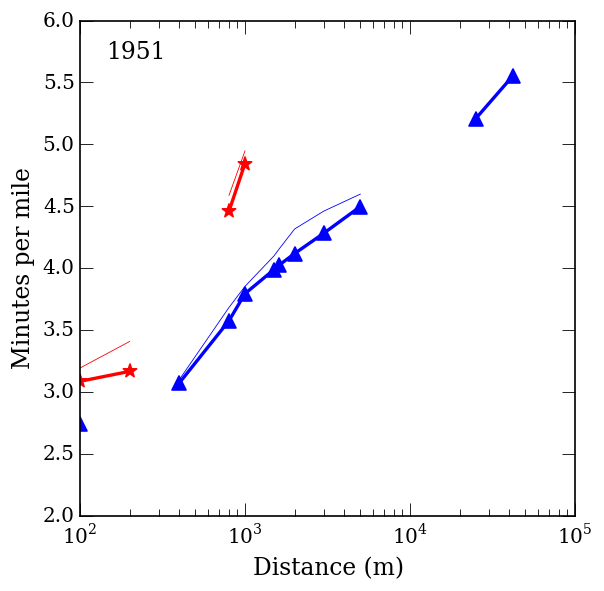

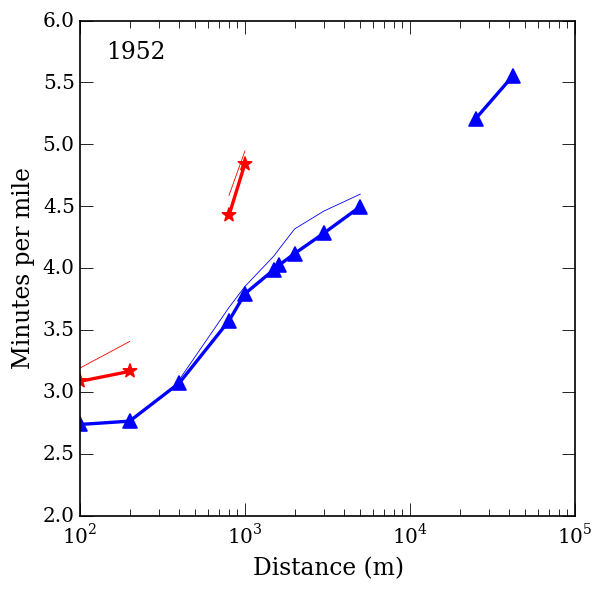

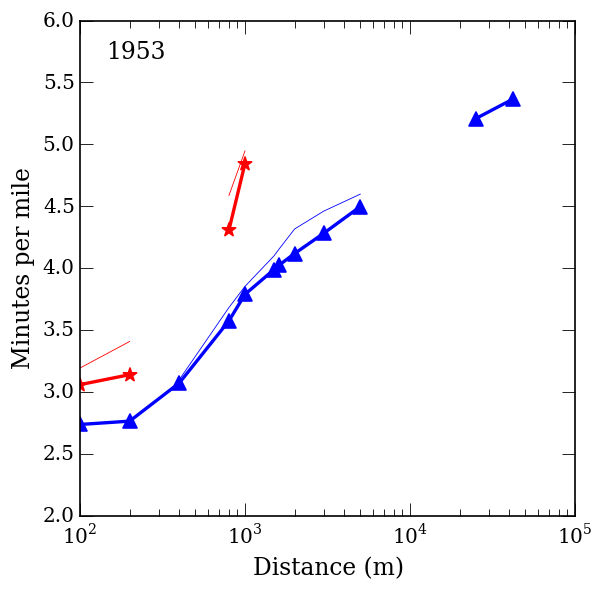

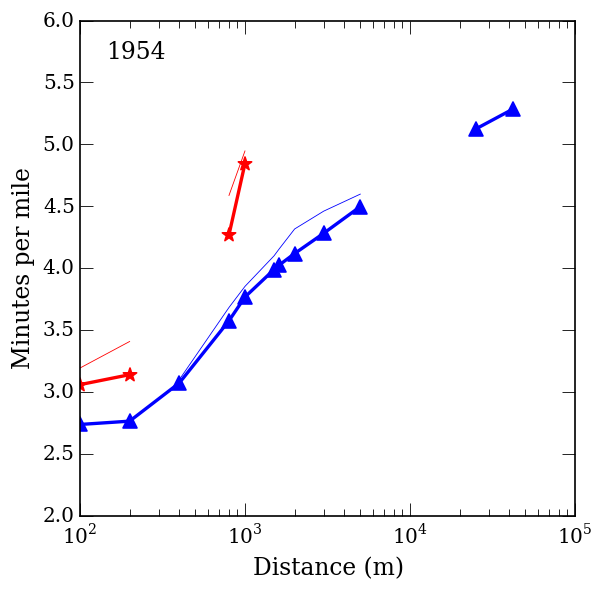

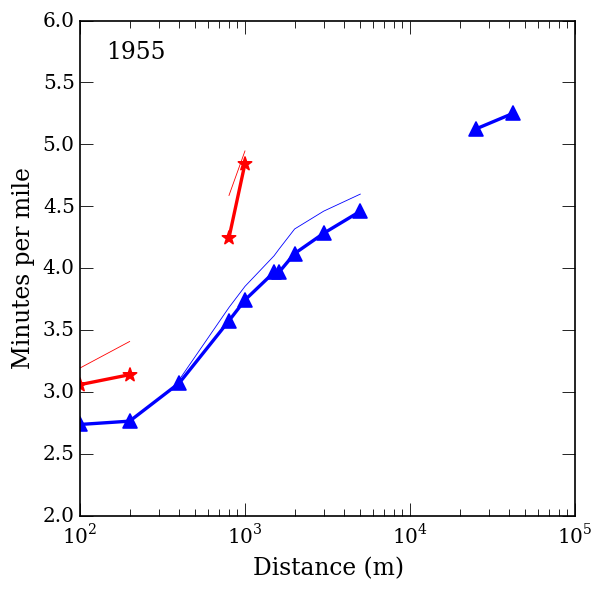

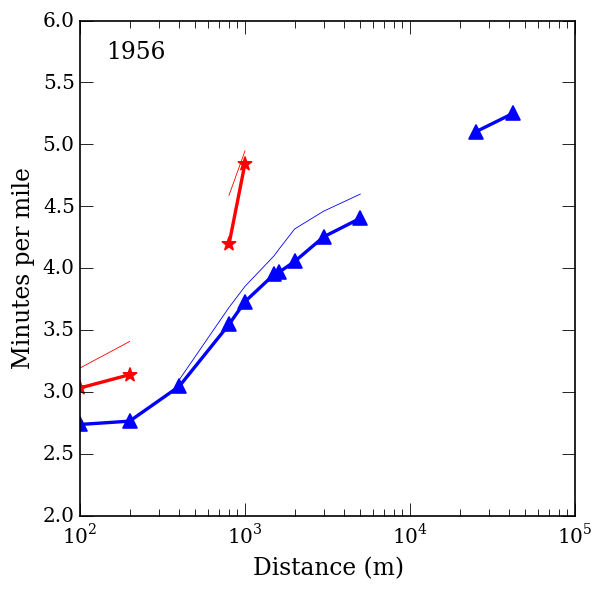

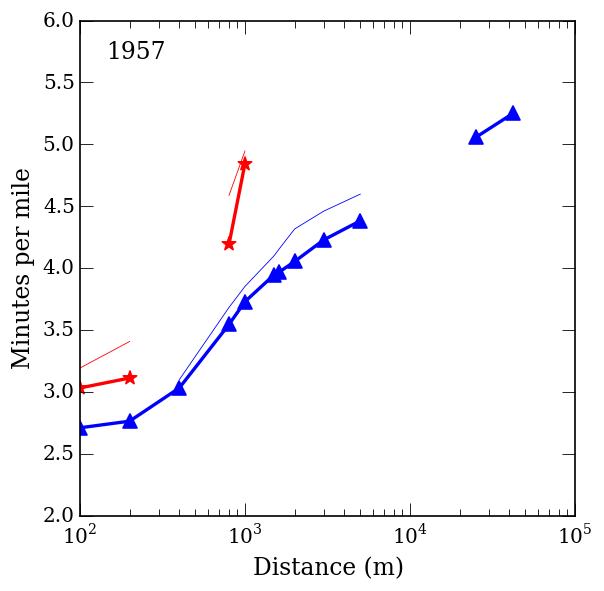

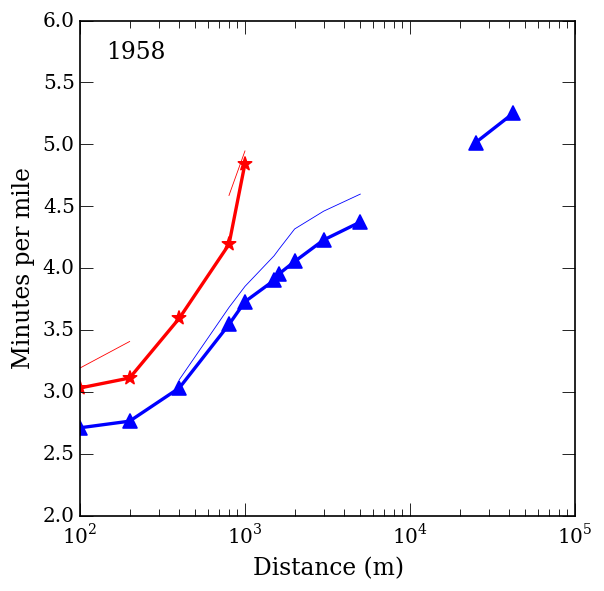

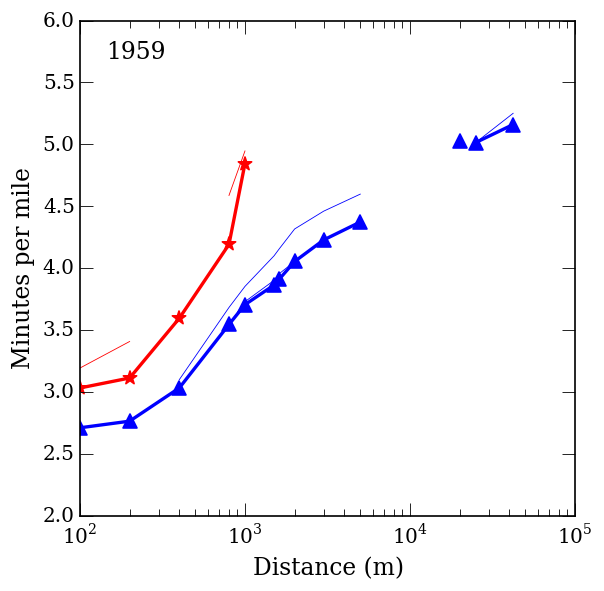

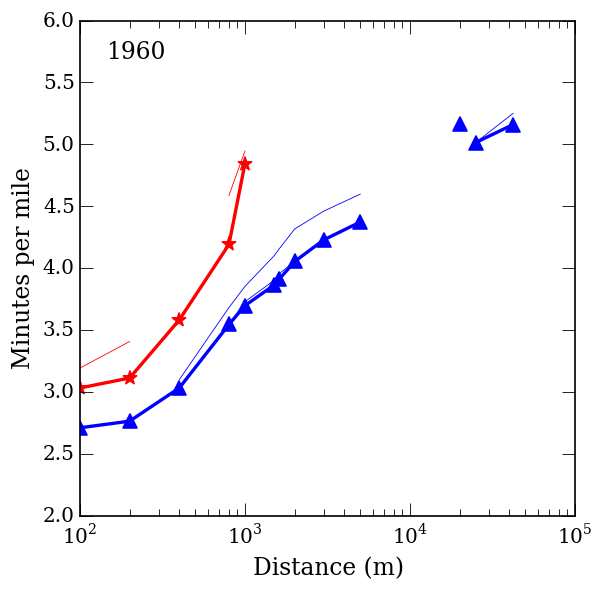

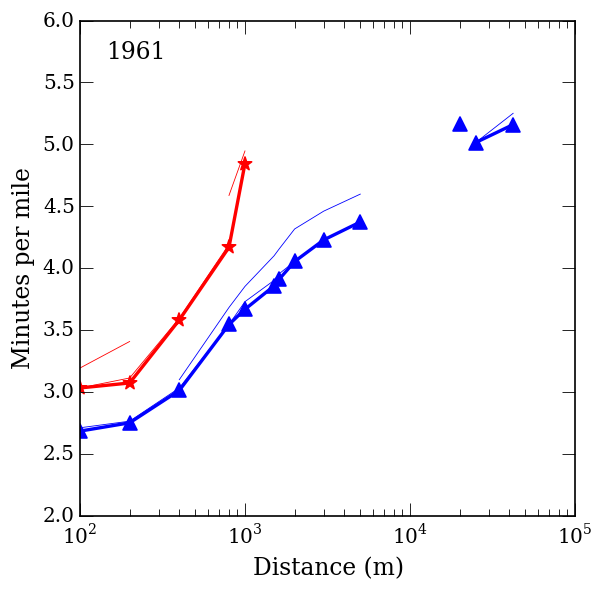

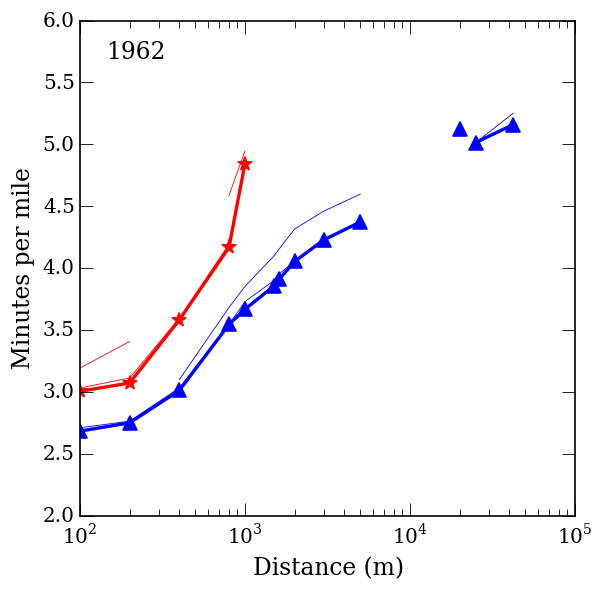

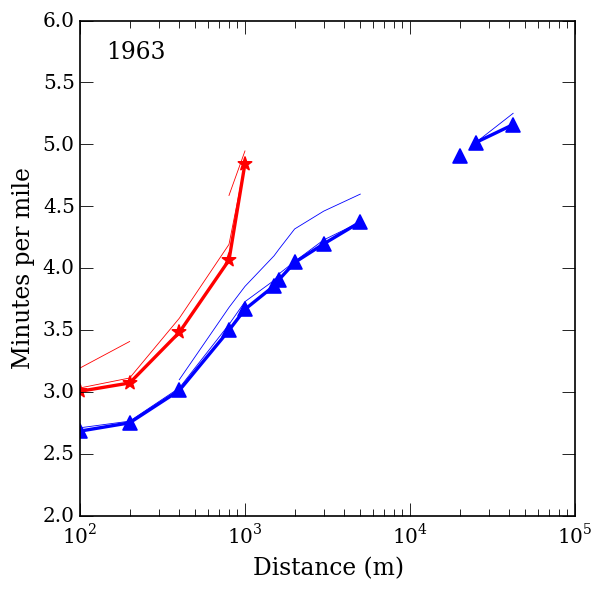

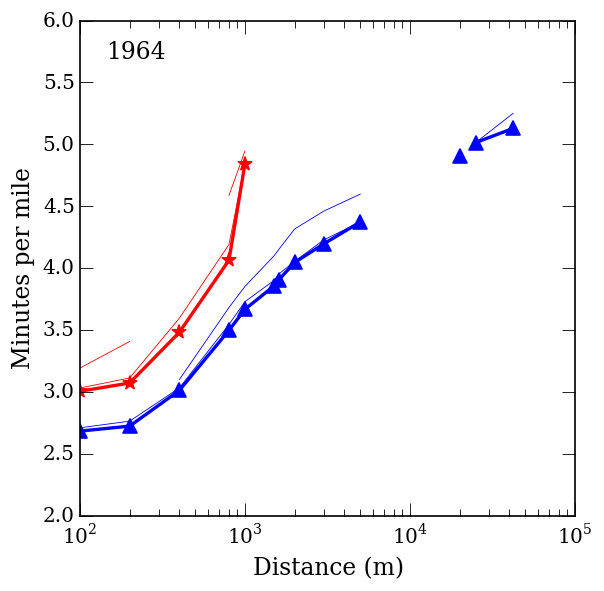

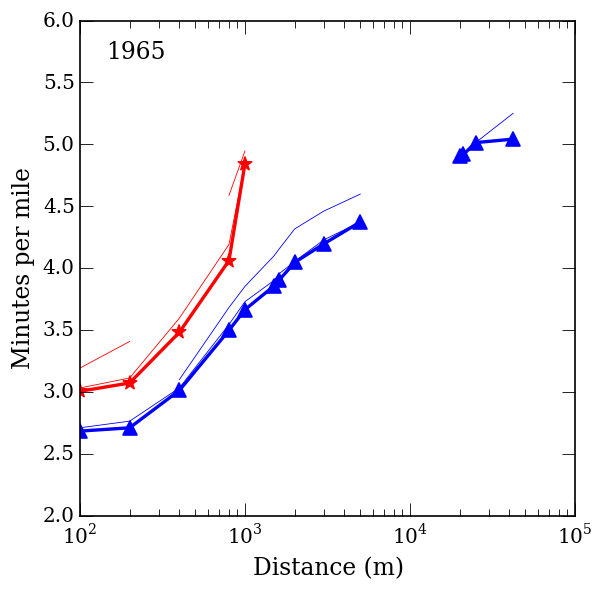

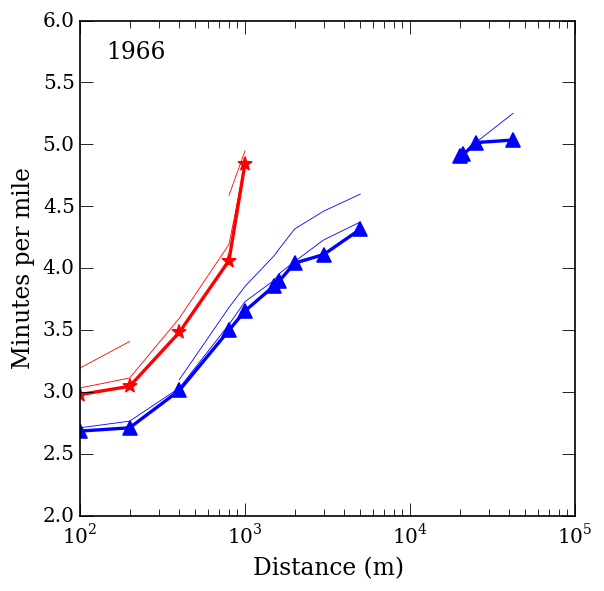

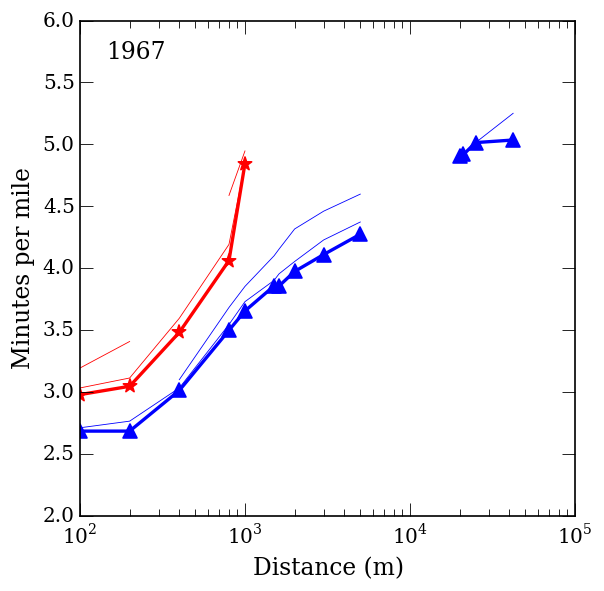

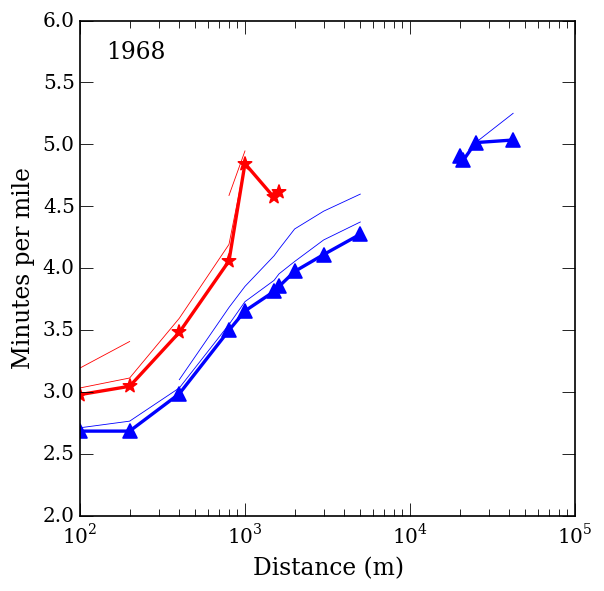

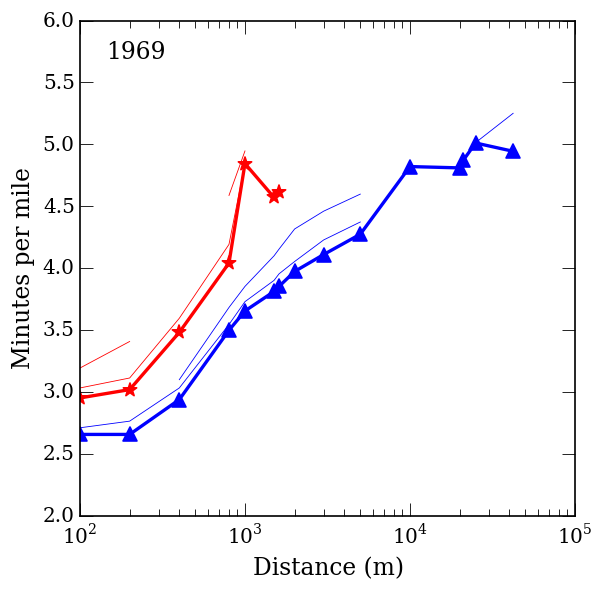

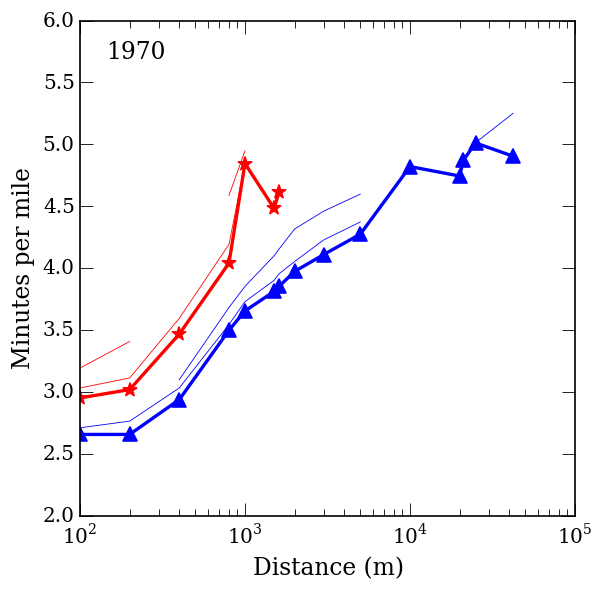

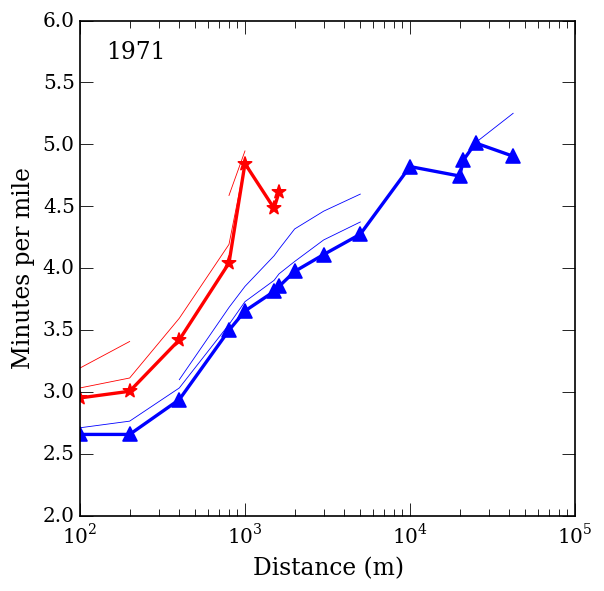

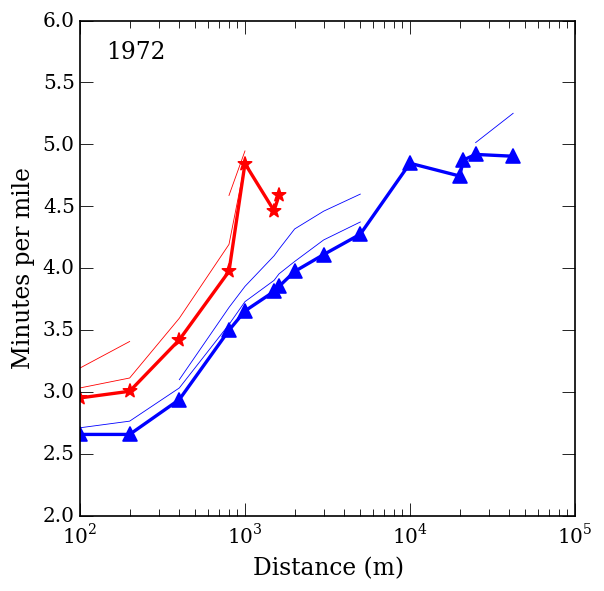

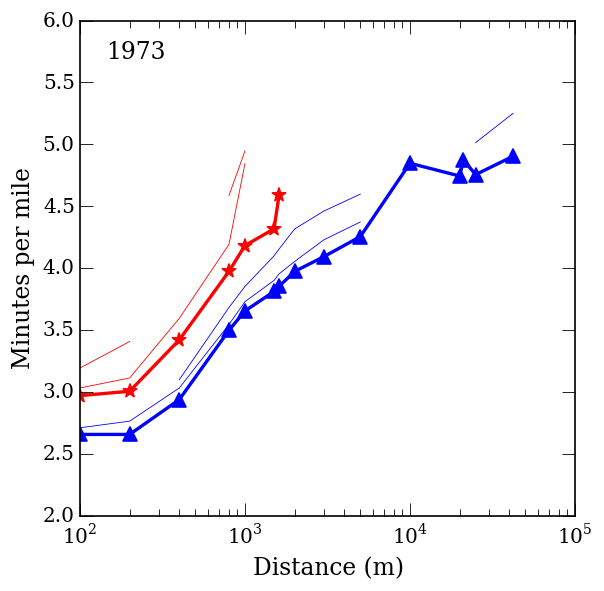

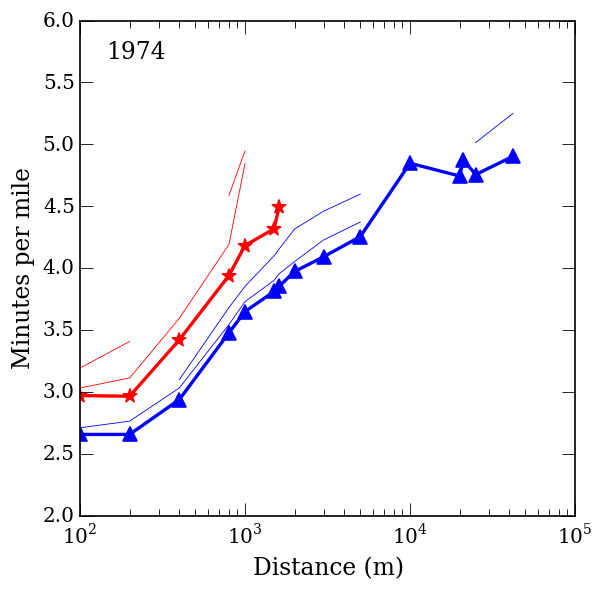

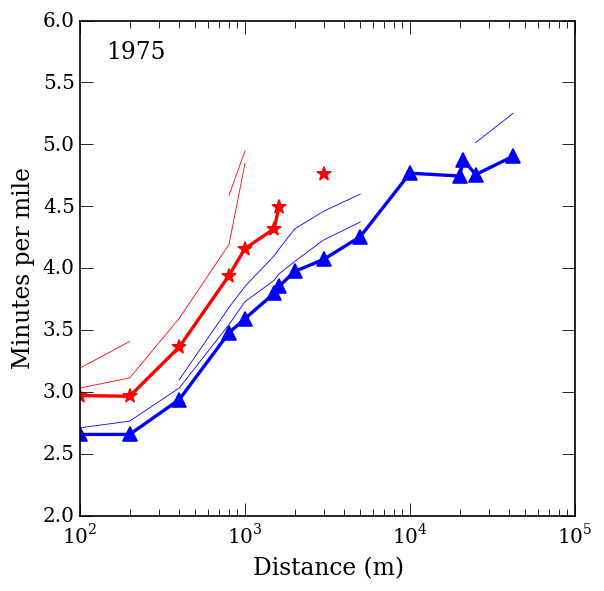

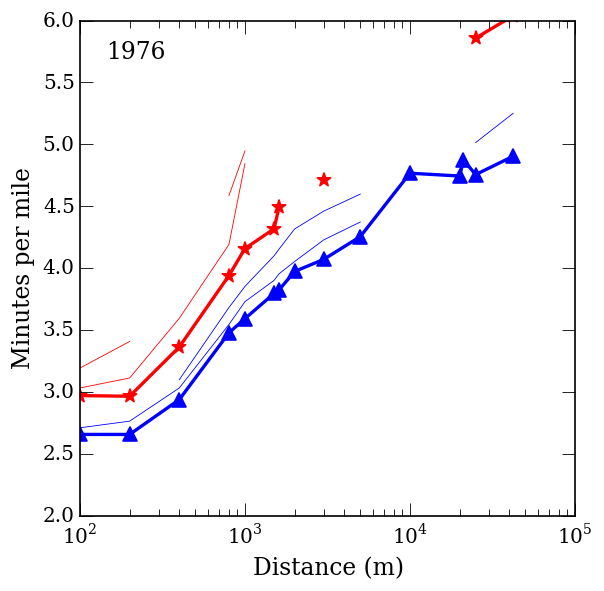

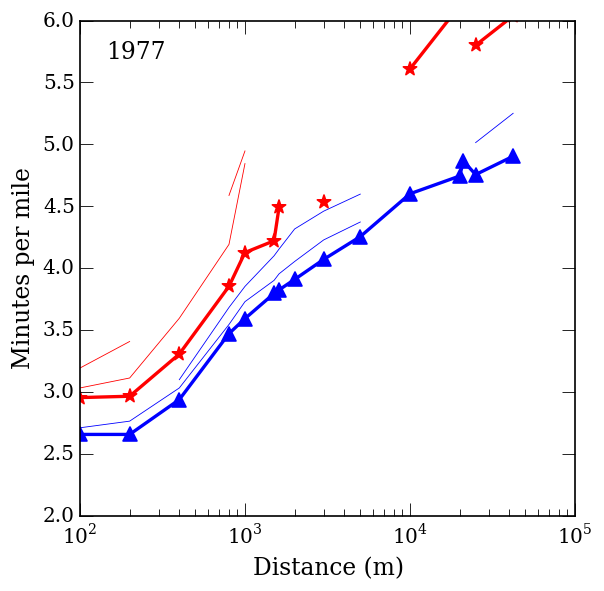

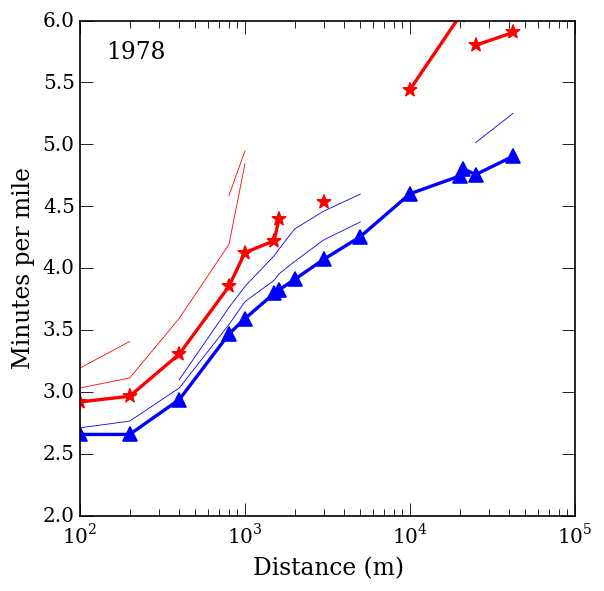

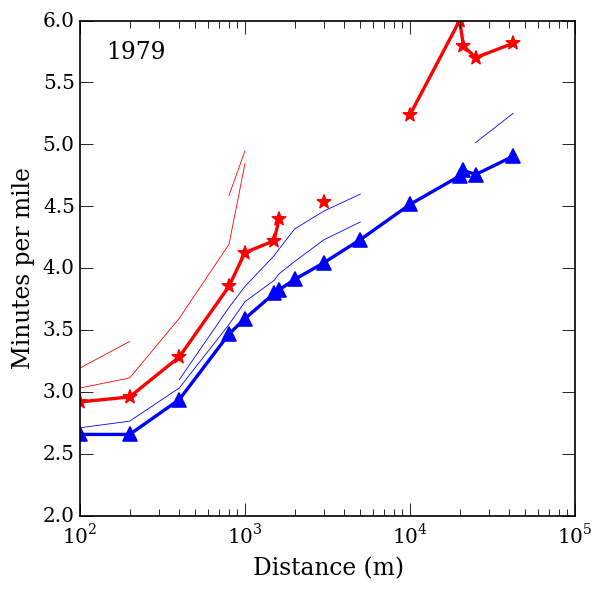

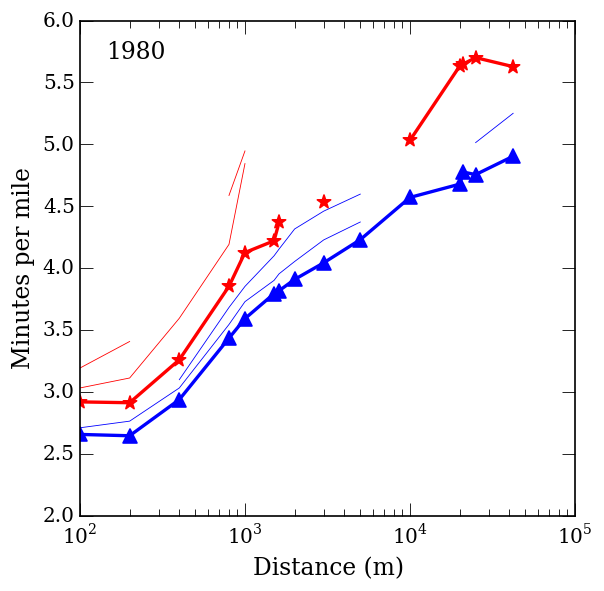

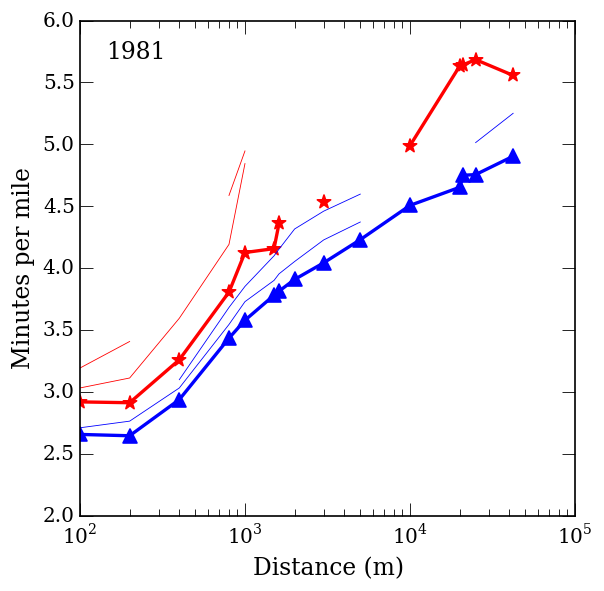

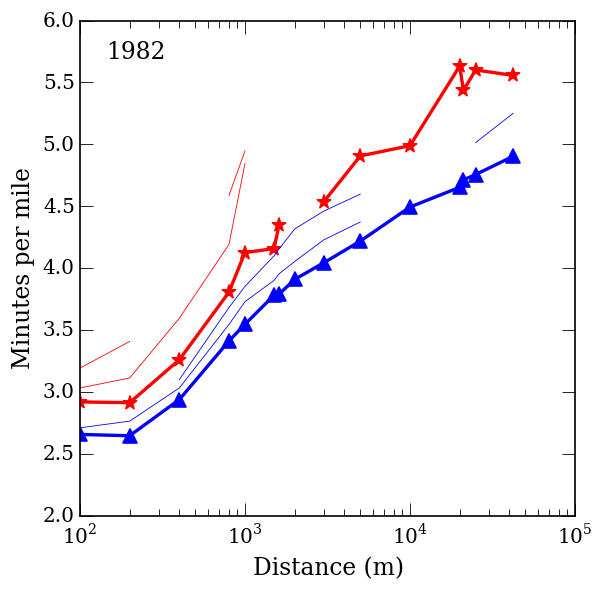

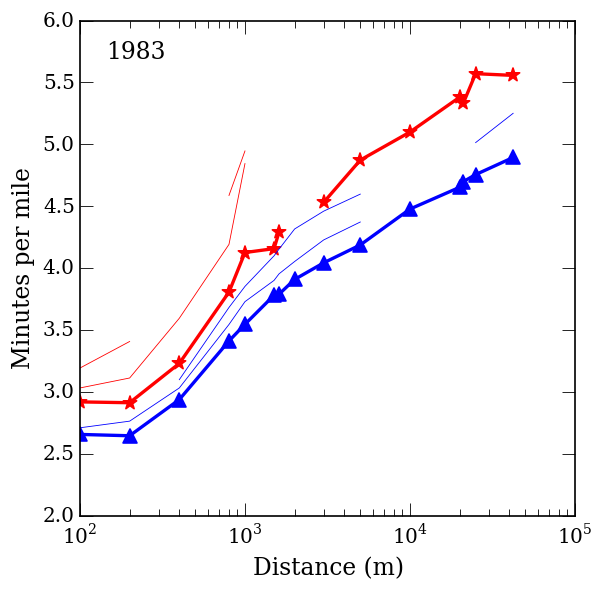

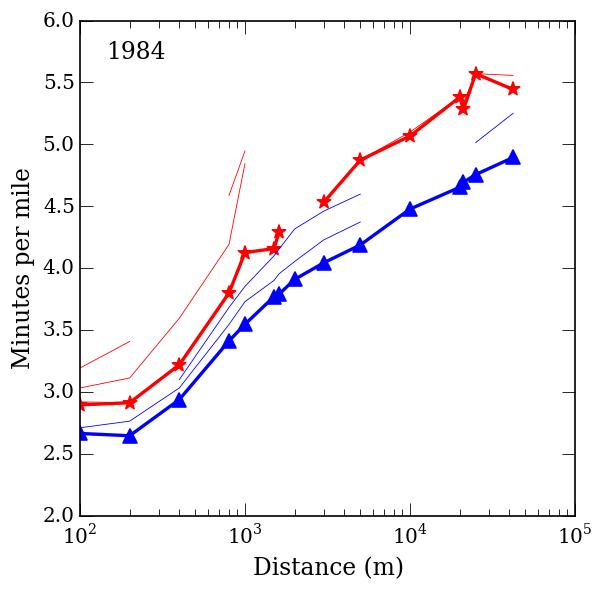

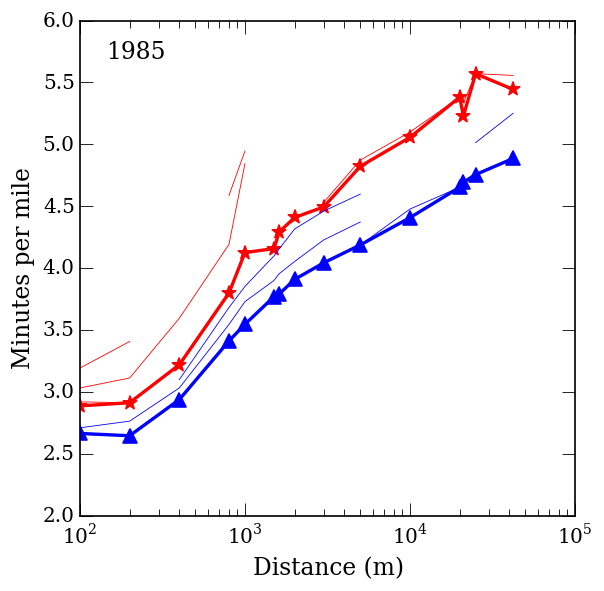

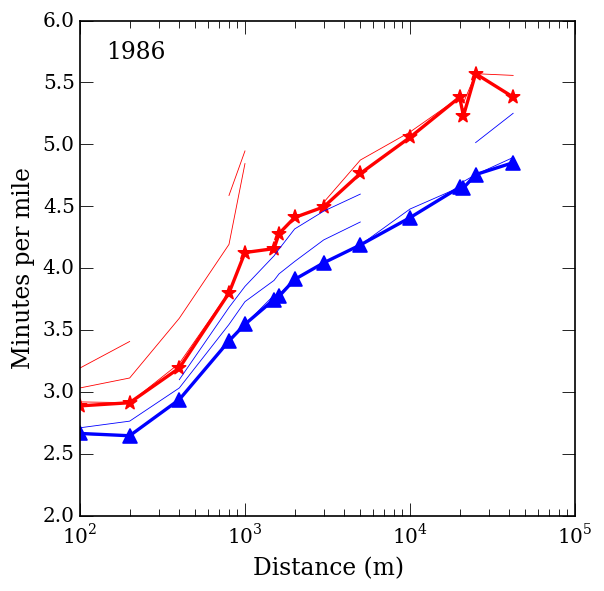

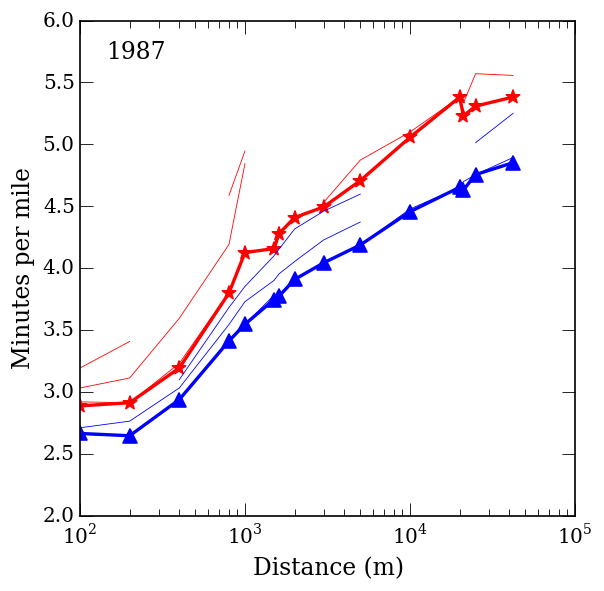

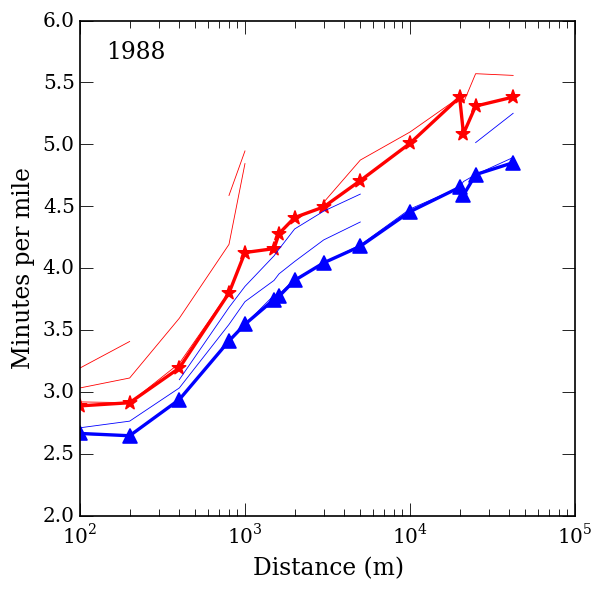

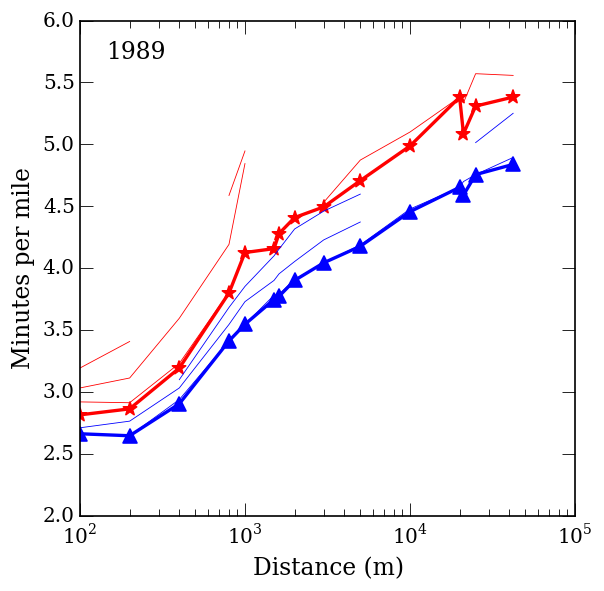

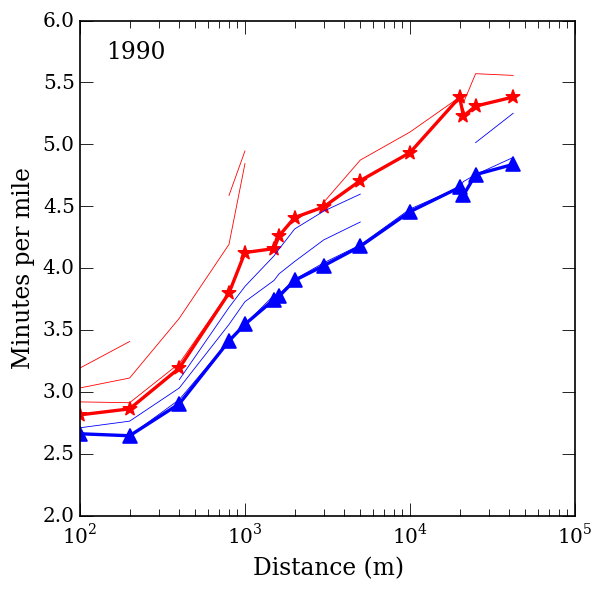

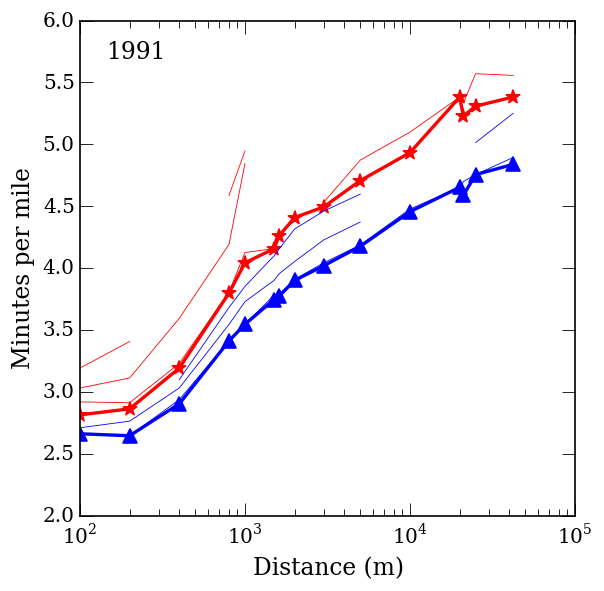

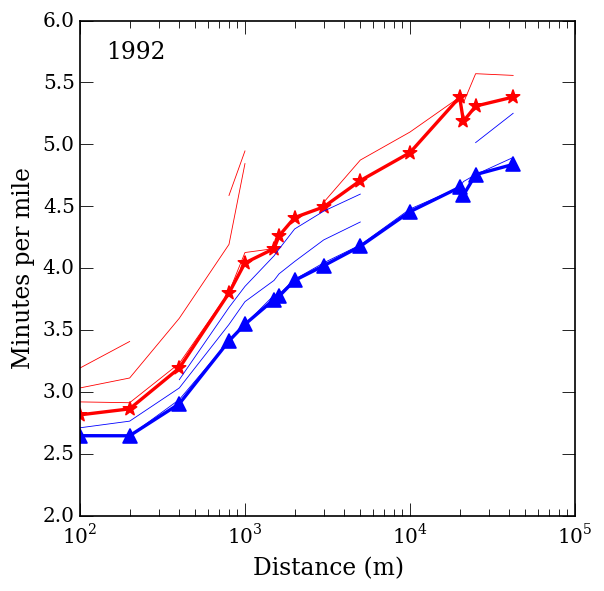

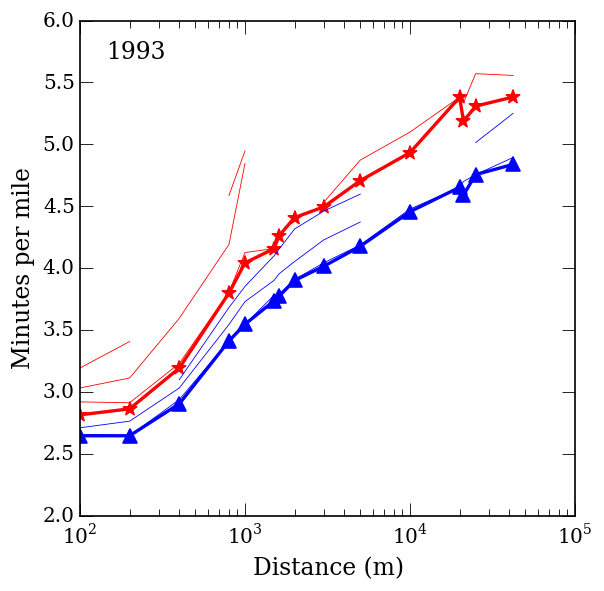

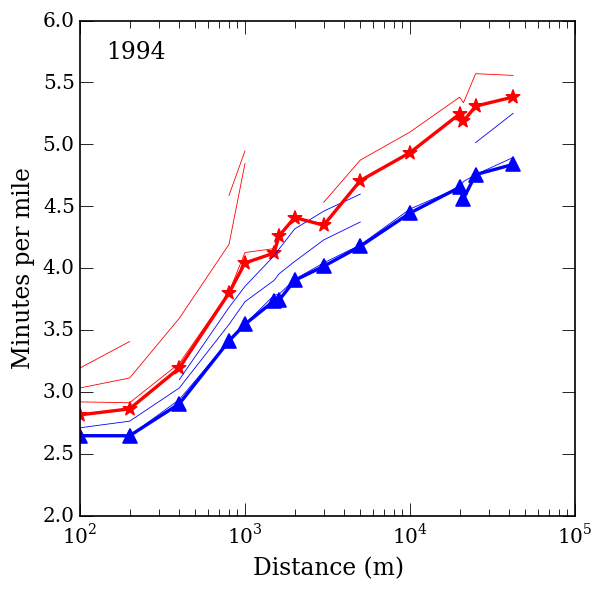

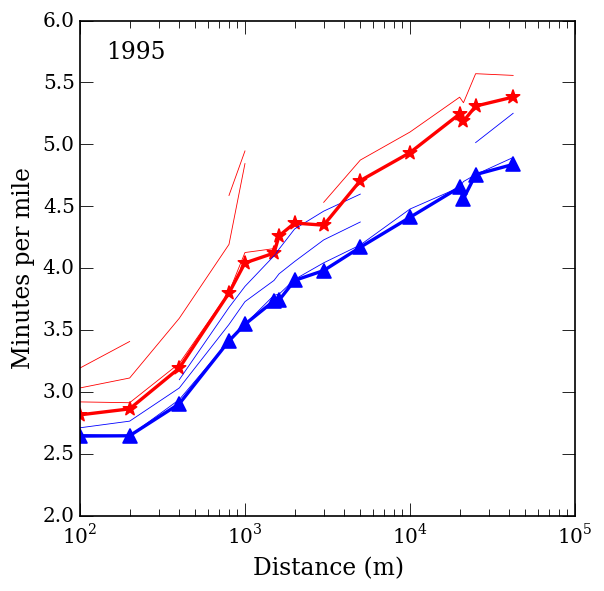

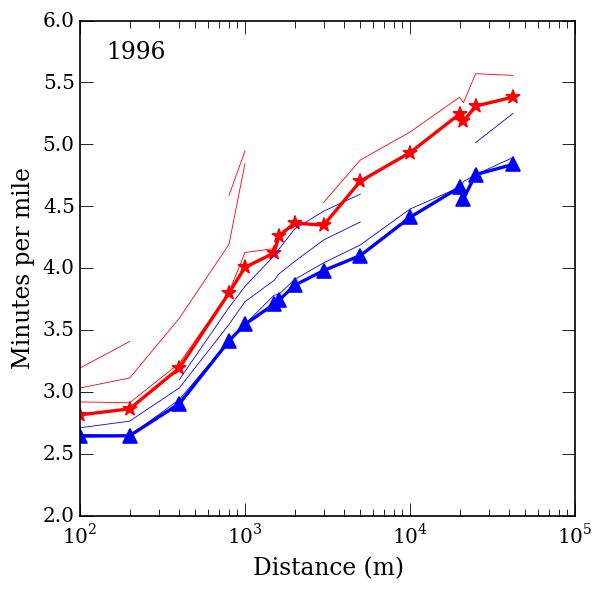

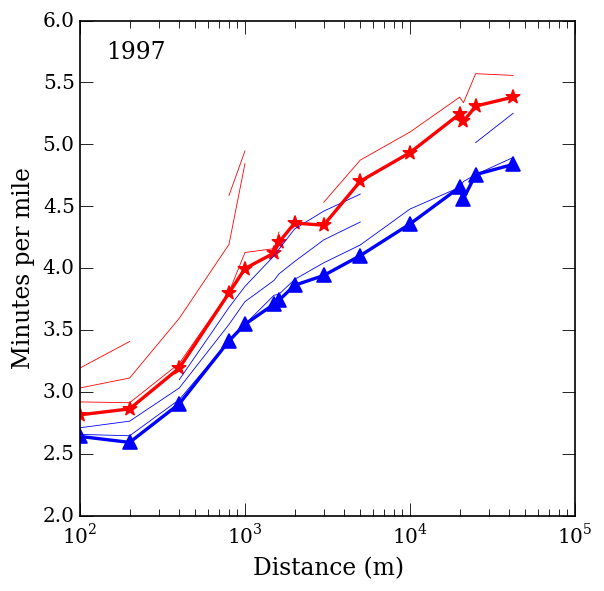

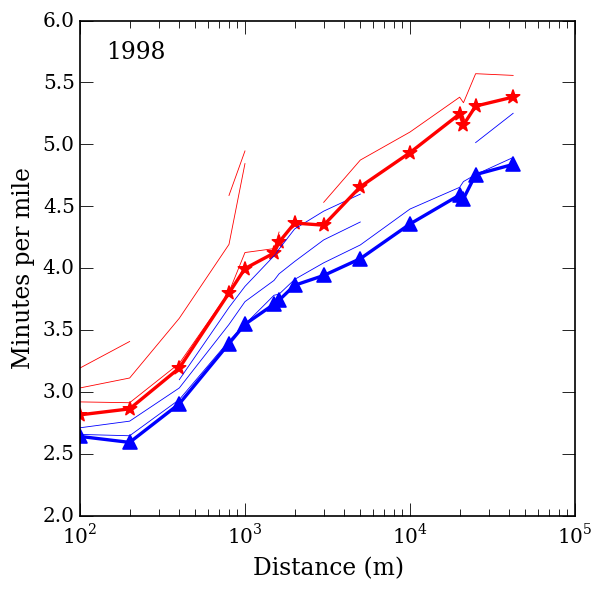

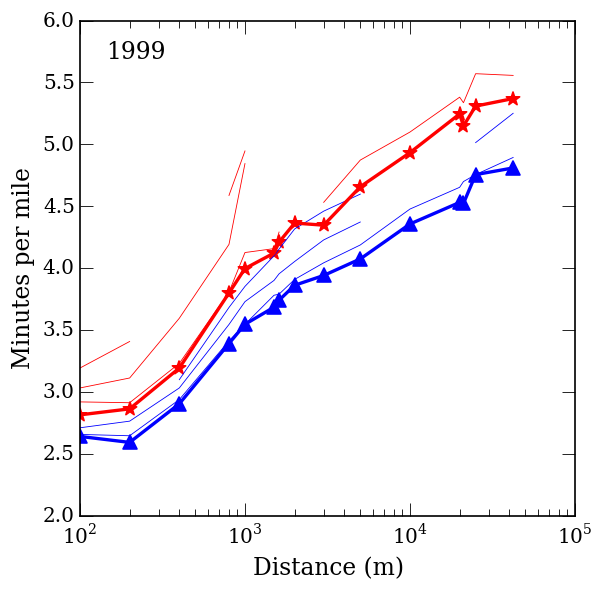

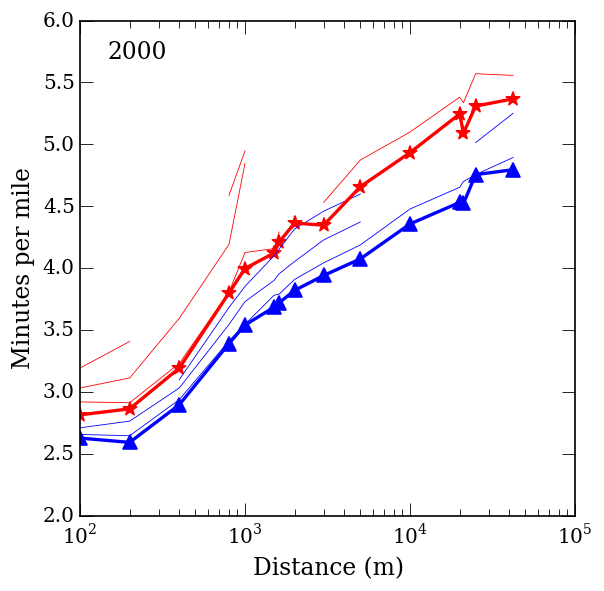

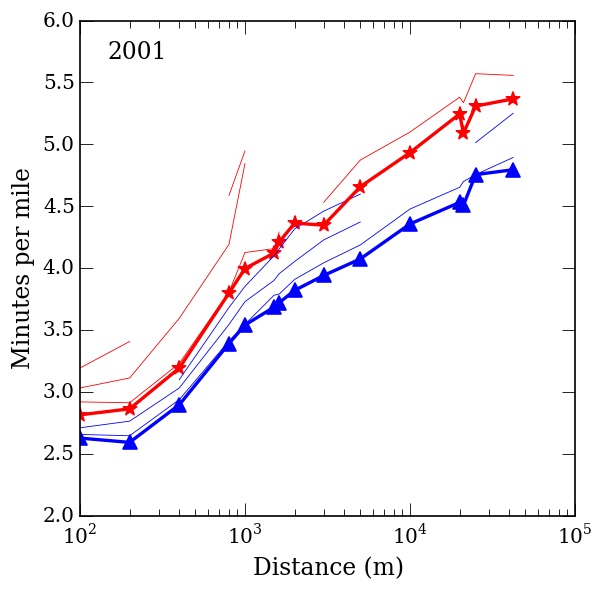

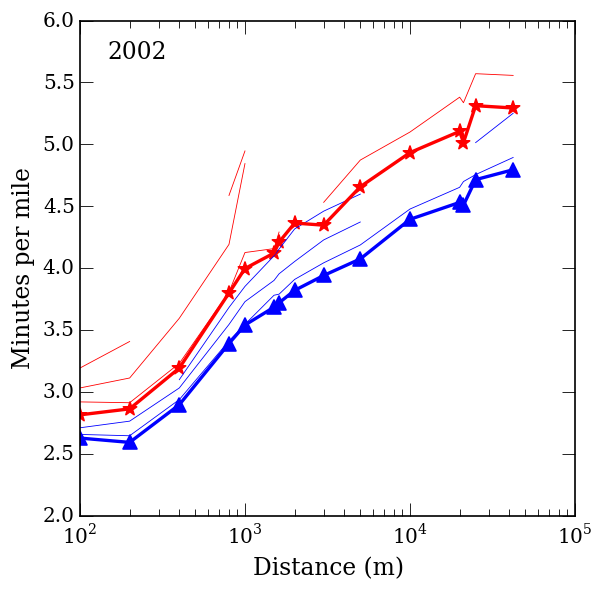

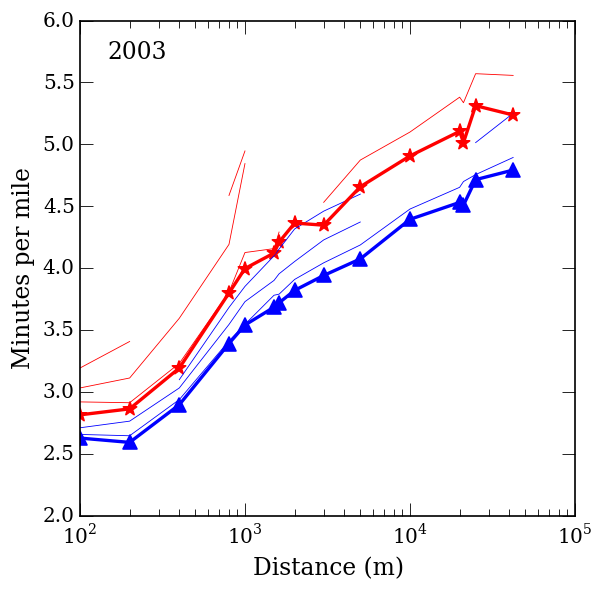

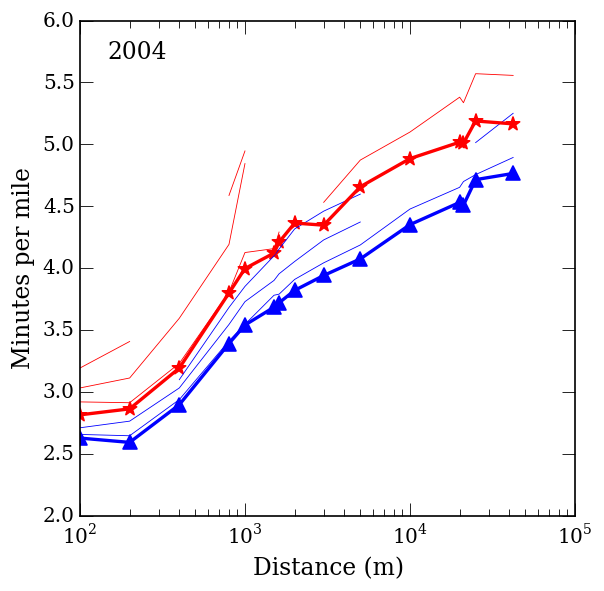

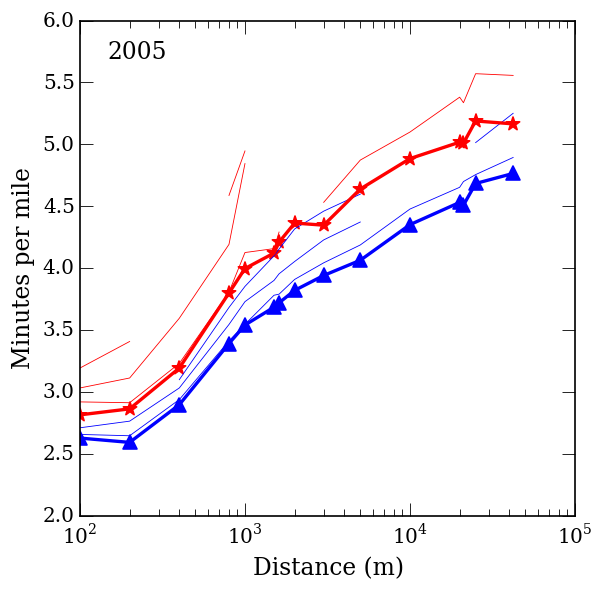

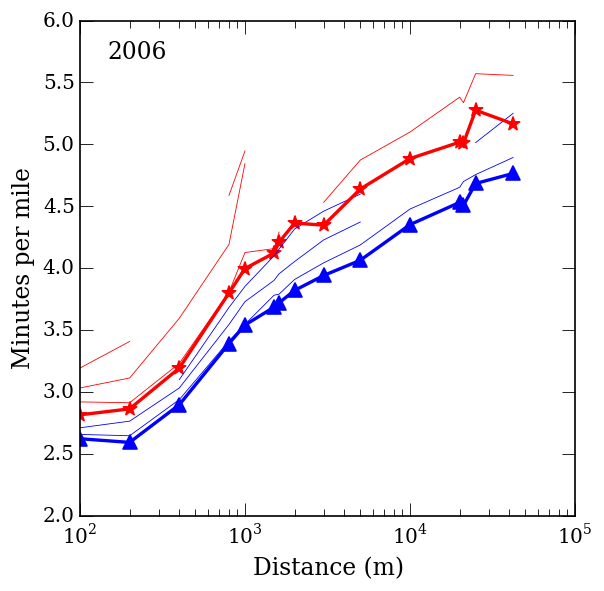

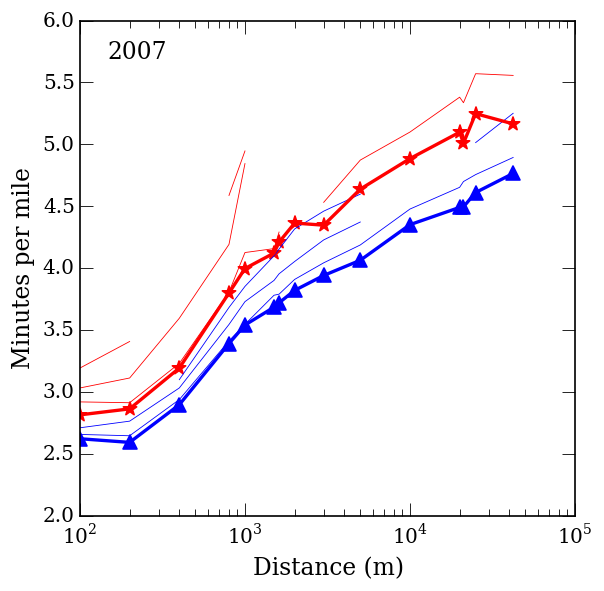

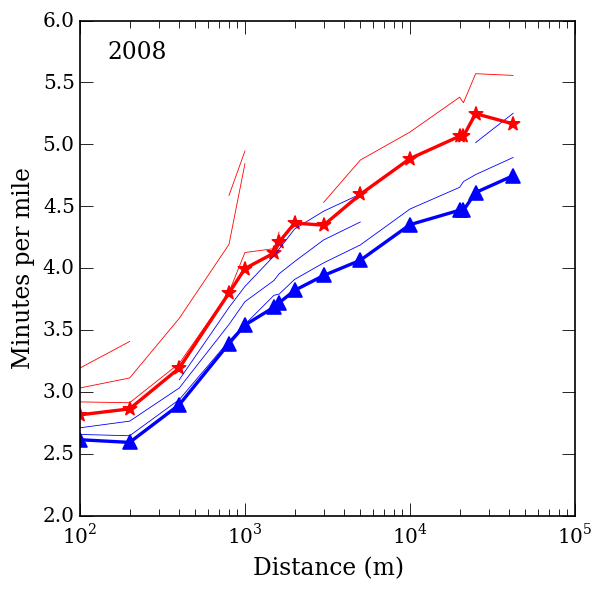

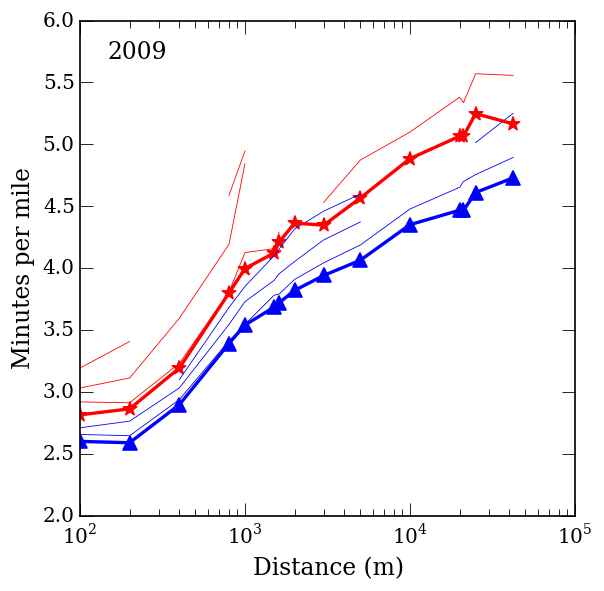

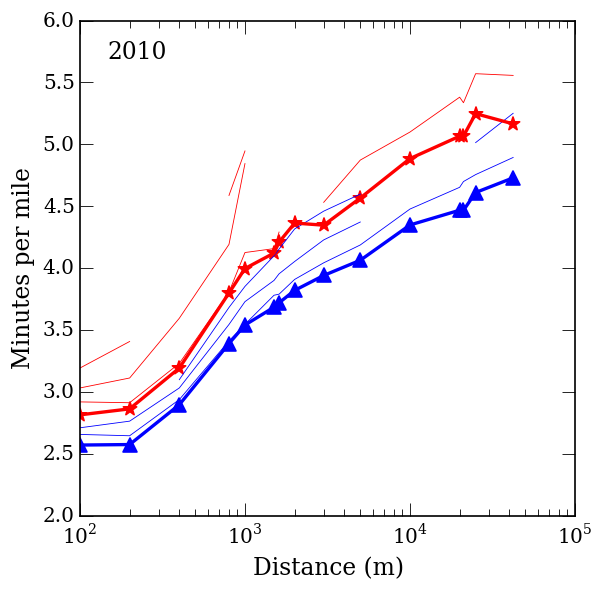

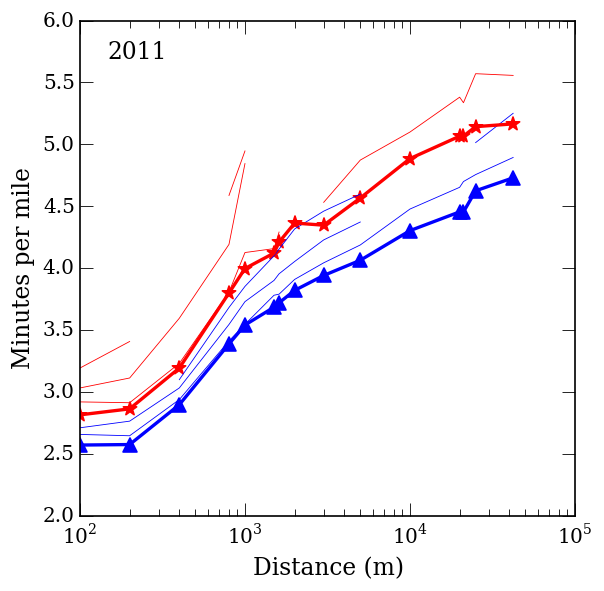

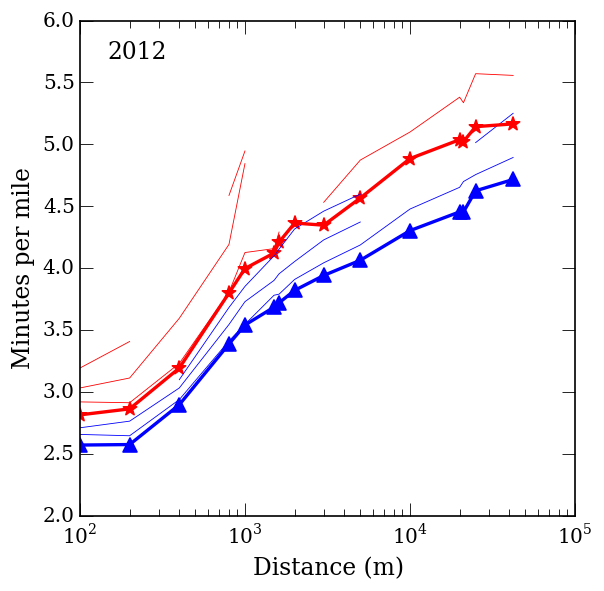

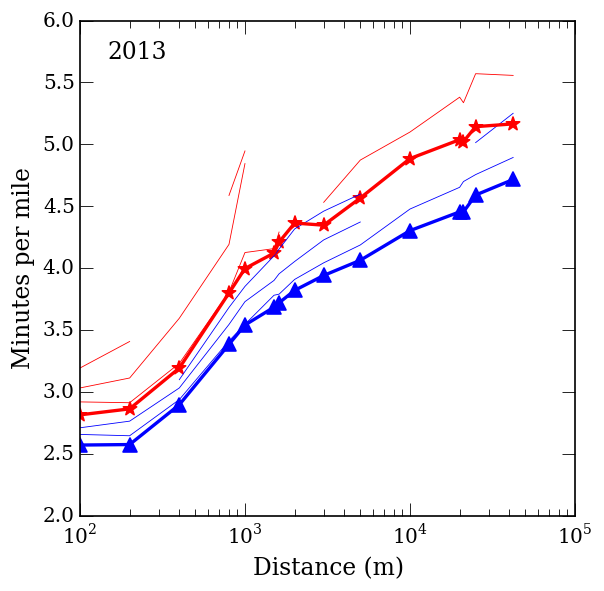

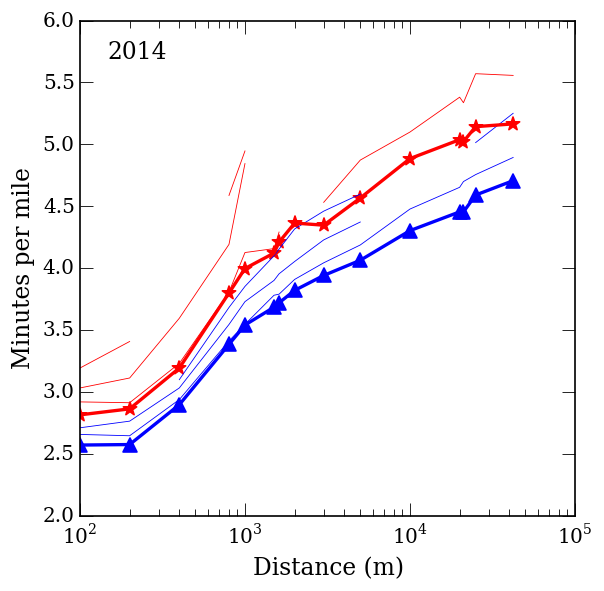

In [20]:
for i in arange(years.size):
    figure()
    if(i > 0):

        semilogx(distance[:distance.size/2],pps[0,:],lw=.5,c='b')
        semilogx(distance[:distance.size/2],ppsf[0,:],lw=.5,c='r')

    if(i > 25):

        semilogx(distance[:distance.size/2],pps[25,:],lw=.5,c='b')
        semilogx(distance[:distance.size/2],ppsf[25,:],lw=.5,c='r')

    if(i > 50):
        semilogx(distance[:distance.size/2],pps[50,:],lw=.5,c='b')
        semilogx(distance[:distance.size/2],ppsf[50,:],lw=.5,c='r')

    if(i > 75):
        semilogx(distance[:distance.size/2],pps[75,:],lw=.5,c='b')
        semilogx(distance[:distance.size/2],ppsf[75,:],lw=.5,c='r')
        
    semilogx(distance[:distance.size/2],pps[i,:],lw=2,c='b')
    semilogx(distance[:distance.size/2],ppsf[i,:],lw=2,c='r')

    scatter(distance[:distance.size/2],pps[i,:],marker='^',c='b',edgecolor='b',s=70)
    scatter(distance[:distance.size/2],ppsf[i,:],marker='*',c='r',edgecolor='r',s=70)

    text(150,5.70,years[i])
    axis([100,1.e5,2,6])
    xlabel('Distance (m)')
    ylabel('Minutes per mile')
    savefig('png/'+str(years[i])+'.png')

###Calculate how long ago men ran at the same pace as women do in current world records.

In [21]:
dyear = zeros(distance.size/2)
for i in arange(distance.size/2):
    #check date when men had same time as latest women's record
    min_ind = df2['Time'][(df2['Gender']=='f')*(df2['Distance']==distance[i])].argmin()
    f_year = df2['Year'][min_ind]
    f_time = df2['Time'][min_ind]
    try:
        m_year = df2['Year'][(df2['Gender']=='m')*(df2['Distance']==distance[i])*(df2['Time']>=f_time)].values[-1]
    except:
        m_year = f_year+1
    dyear[i] = f_year-m_year
    print distance[i],f_year, f_year-m_year

100.0 1988.58333333 67.8333333333
200.0 1988.75 -1.0
400.0 1985.83333333 73.25
800.0 1983.58333333 -1.0
1000.0 1996.66666667 77.9166666667
1500.0 1993.75 67.0
1609.34 1996.66666667 81.0833333333
2000.0 1994.58333333 69.0833333333
3000.0 1993.75 53.0833333333
5000.0 2008.5 76.0
10000.0 2003.16666667 -1.0
20000.0 2015.16666667 53.5833333333
21097.5 2015.16666667 48.6666666667
25000.0 2010.41666667 55.0
42195.0 2003.33333333 48.8333333333


In [22]:
def extend_year(x,year=2015):
    return append(x,year)
def extend_data(x):
    return append(x,x[-1])
targ = []
def eplot(*args, **kwargs):
   
    argtmp = [extend_year(args[0]),extend_data(args[1])]
    for i in args[2:]:
        argtmp.append(i)
    argtmp = tuple(argtmp)
    plot(*argtmp,**kwargs)

###World Records by event
Plot the Men's (Blue) and Women's (Red) world records times for each event.  The dashed blue line show the Men's records, shifted in time.

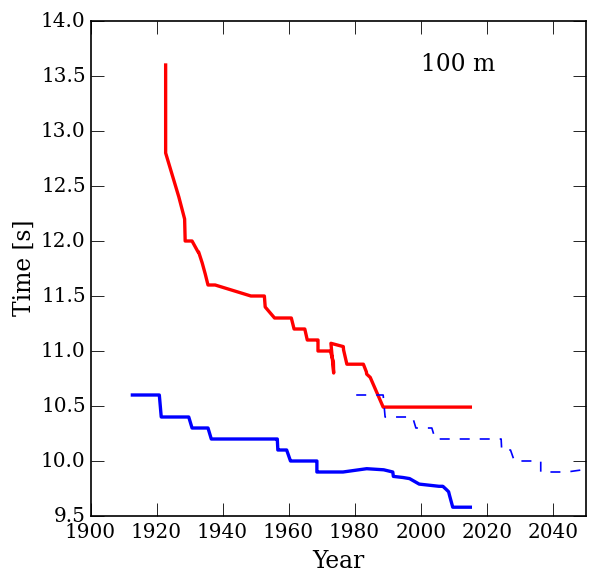

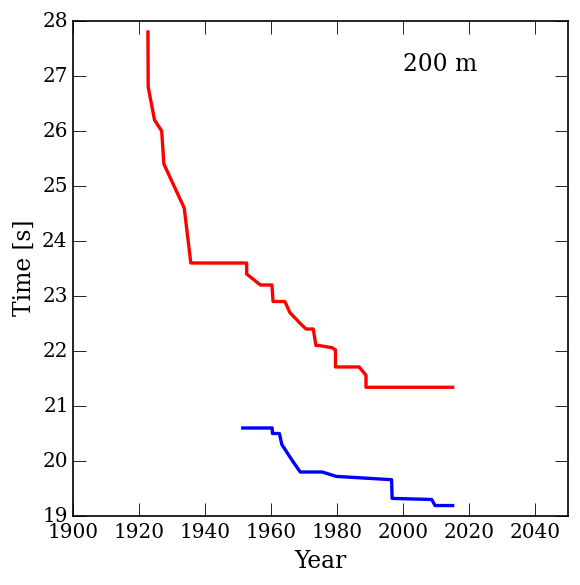

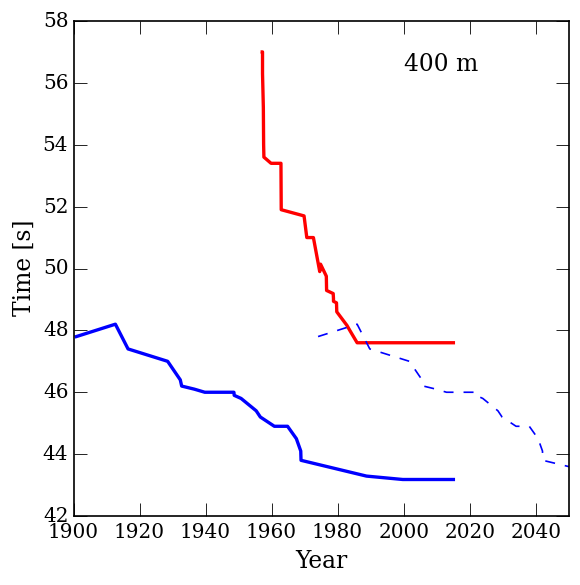

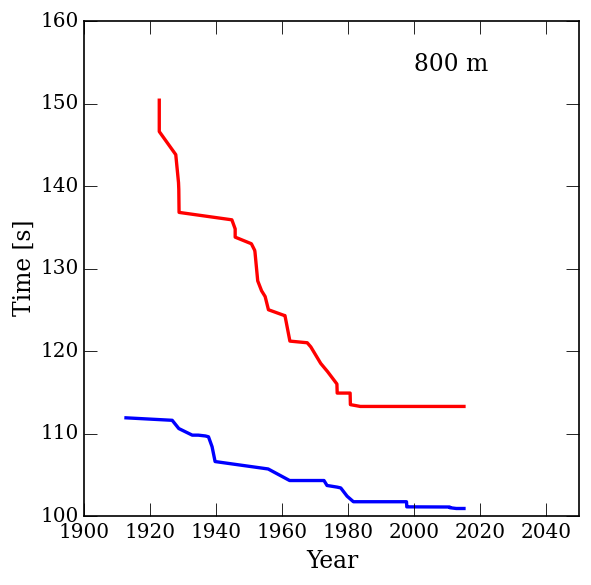

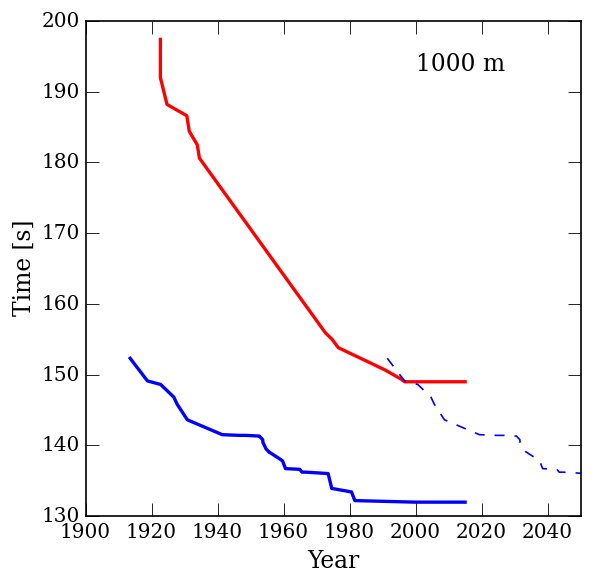

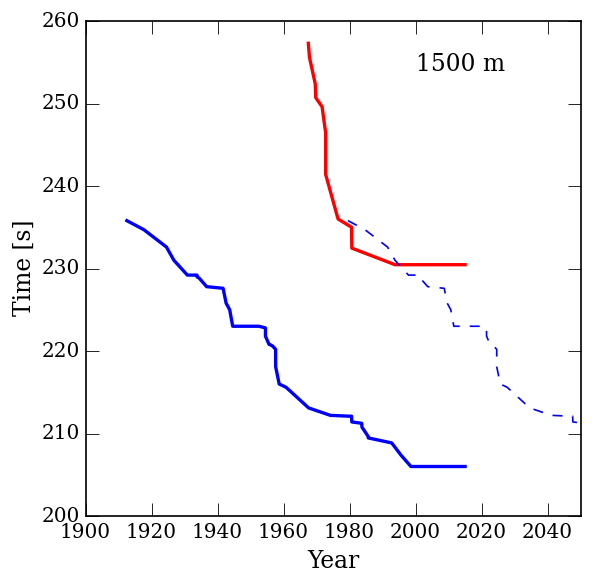

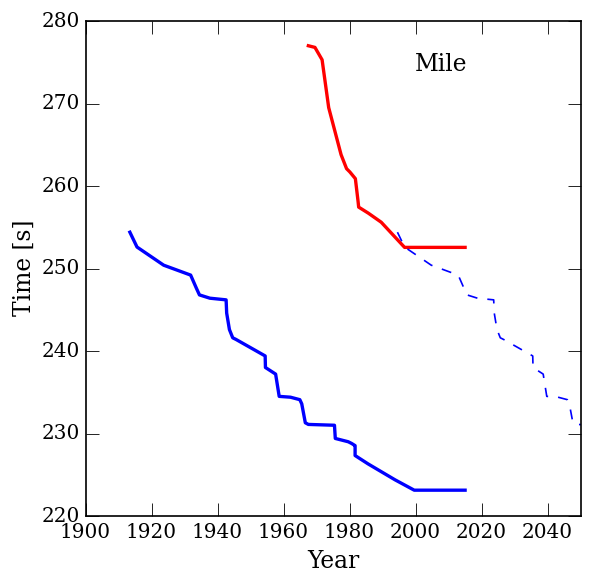

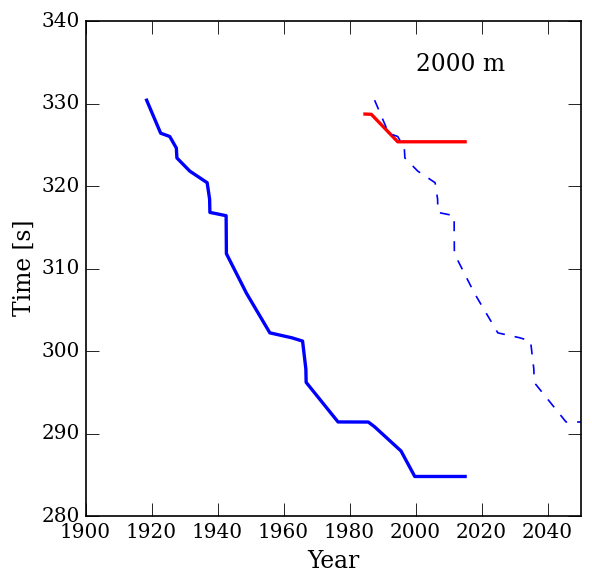

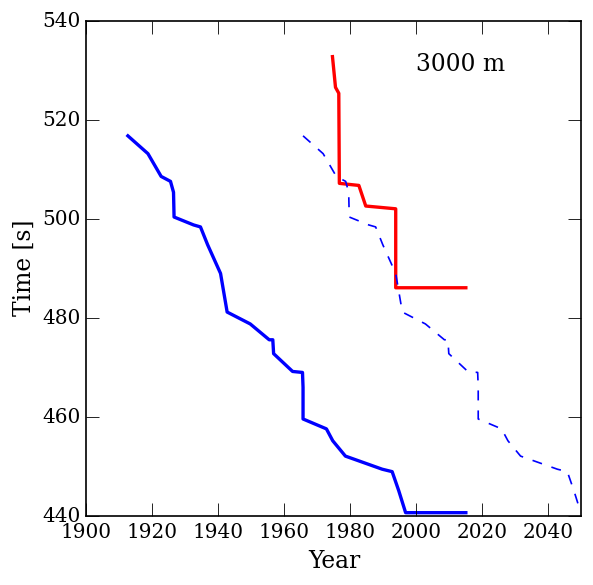

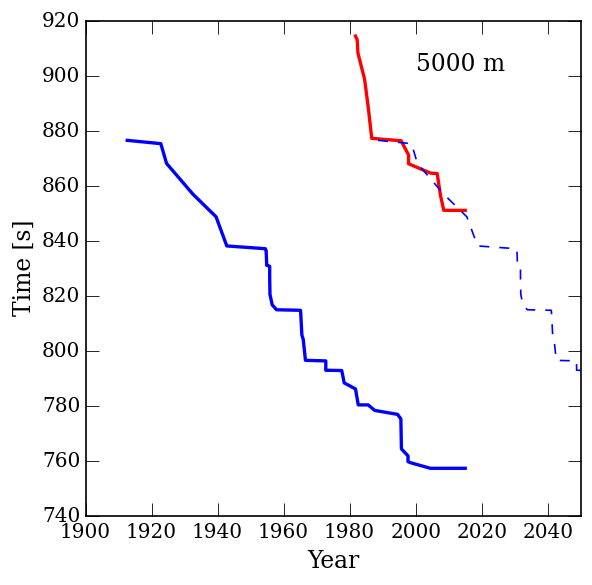

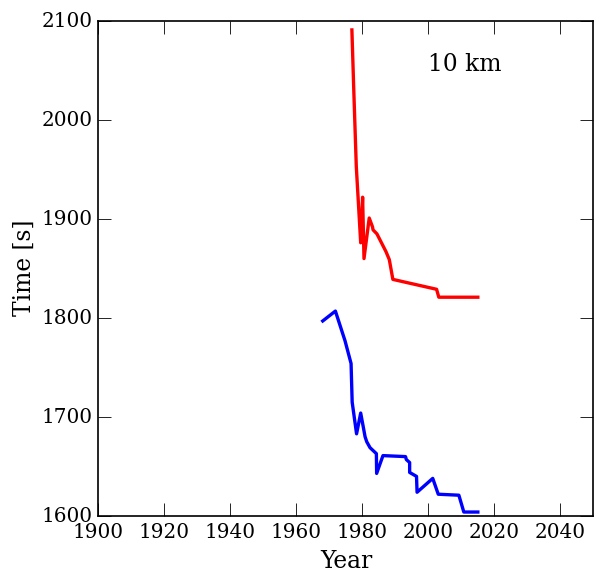

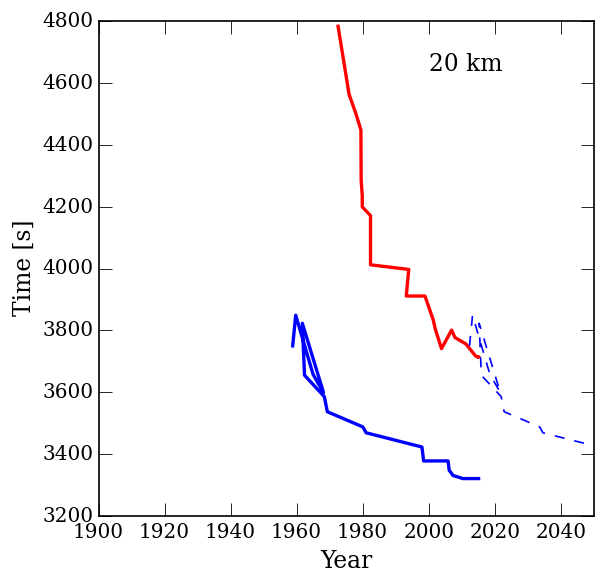

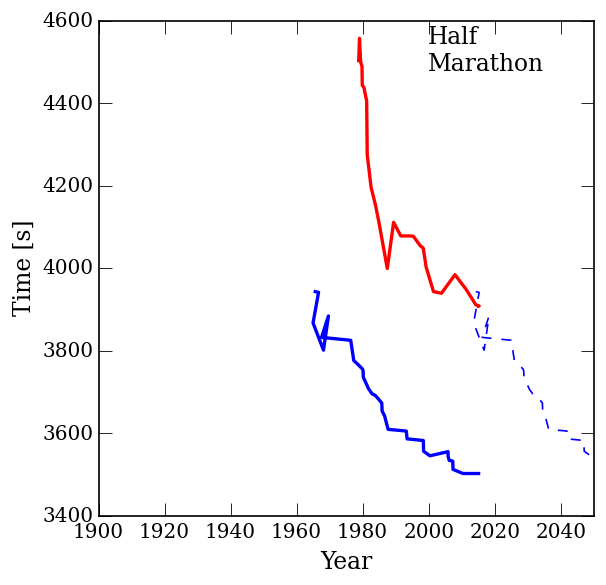

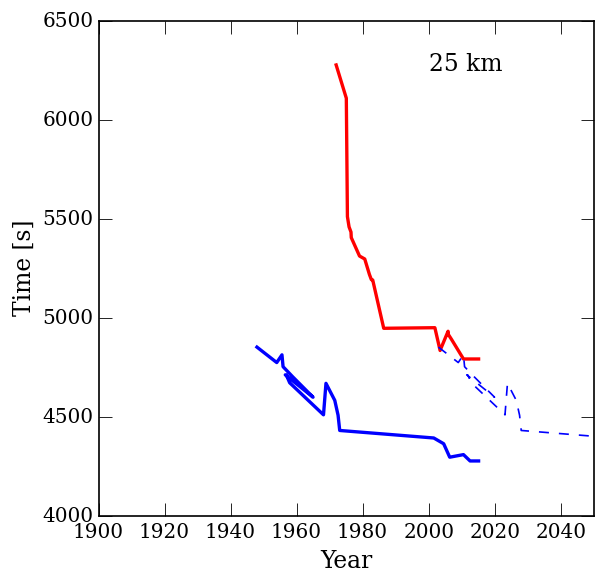

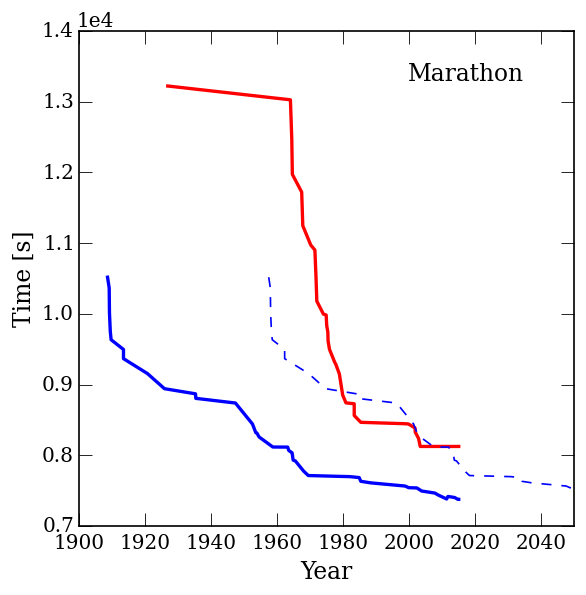

In [23]:
for i in arange(distance.size/2):
    figure()
    mtime = (df2['Gender']=='m')*(df2['Distance']==distance[i])
    ftime = (df2['Gender']=='f')*(df2['Distance']==distance[i])
    eplot(df2['Year'][mtime].values,df2['Time'][mtime].values,'b-',lw=2)
    eplot(df2['Year'][ftime].values,df2['Time'][ftime].values,'r-',lw=2)
    if(dyear[i]>0):
        plot(df2['Year'][mtime].values+dyear[i],df2['Time'][mtime].values,'b--',lw=1)
    xlabel(r'Year')
    ylabel(r'Time [s]')
    xlim([1900,2050])
    yup = axis()[3]
    ybt = axis()[2]
    text(2000,(.9)*(yup-ybt)+ybt,Ndistance[i])
    # label()

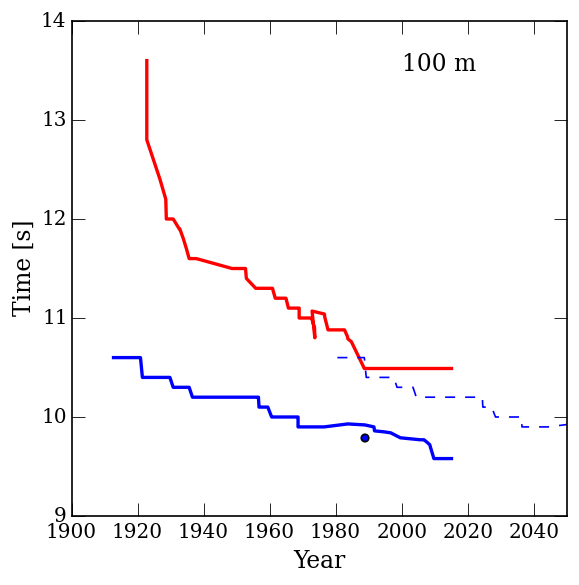

In [24]:
for i in [0]:
    figure()
    mtime = (df2['Gender']=='m')*(df2['Distance']==distance[i])
    ftime = (df2['Gender']=='f')*(df2['Distance']==distance[i])
    eplot(df2['Year'][mtime].values,df2['Time'][mtime].values,'b-',lw=2)
    eplot(df2['Year'][ftime].values,df2['Time'][ftime].values,'r-',lw=2)
    scatter(1988.75,9.79)
    if(dyear[i]>0):
        plot(df2['Year'][mtime].values+dyear[i],df2['Time'][mtime].values,'b--',lw=1)
    xlabel(r'Year')
    ylabel(r'Time [s]')
    xlim([1900,2050])
    yup = axis()[3]
    ybt = axis()[2]
    text(2000,(.9)*(yup-ybt)+ybt,Ndistance[i])
    # label()

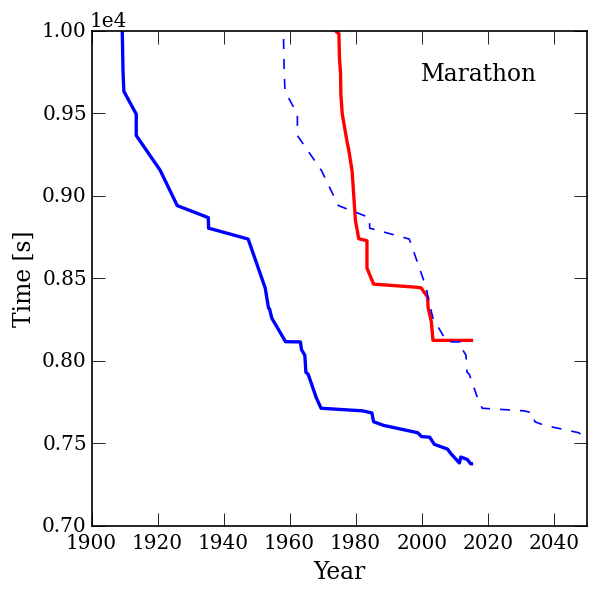

In [25]:
for i in [14]:
    figure()
    mtime = (df2['Gender']=='m')*(df2['Distance']==distance[i])
    ftime = (df2['Gender']=='f')*(df2['Distance']==distance[i])
    eplot(df2['Year'][mtime].values,df2['Time'][mtime].values,'b-',lw=2)
    eplot(df2['Year'][ftime].values,df2['Time'][ftime].values,'r-',lw=2)
#    scatter(2016,2*60*60+15*60+25,marker='*',c='r')
    if(dyear[i]>0):
        plot(df2['Year'][mtime].values+dyear[i],df2['Time'][mtime].values,'b--',lw=1)
    xlabel(r'Year')
    ylabel(r'Time [s]')
    xlim([1900,2050])
    ylim([7000,10000])
    yup = axis()[3]
    ybt = axis()[2]
    text(2000,(.9)*(yup-ybt)+ybt,Ndistance[i])
    # label()

### 

###Efffects of Doping?

It is apparent that the pace of new Women's world record's is not the same as the Men's, especially in the short distance races.

This effects is well documented (see, e.g., http://www.slate.com/articles/sports/sports_nut/2011/08/unbreakable.html), and has even led the UK to call for a new start in tracking world records (https://www.theguardian.com/sport/2016/jan/11/uk-athletics-calls-for-world-records-to-be-reset-due-to-doping-crisis-athletics) 

In [31]:
mrecords_after_88 = zeros(distance.size/2)
frecords_after_88 = zeros(distance.size/2)
mrecords_before_88 = zeros(distance.size/2)
frecords_before_88 = zeros(distance.size/2)
mrecords_long = zeros(distance.size/2)
frecords_long = zeros(distance.size/2)
for i in arange(distance.size/2):
    mtime = (df2['Gender']=='m')*(df2['Distance']==distance[i])
    ftime = (df2['Gender']=='f')*(df2['Distance']==distance[i])
    frecords_after_88[i] =  df2['Year'][ftime*(df2['Year']>1988)].count()
    mrecords_after_88[i] =   df2['Year'][mtime*(df2['Year']>1988)].count()
    frecords_before_88[i] =  df2['Year'][ftime*(df2['Year']<=1988)*(df2['Year']>1961)].count()
    mrecords_before_88[i] =  df2['Year'][mtime*(df2['Year']<=1988)*(df2['Year']>1961)].count()
    if(df2['Year'][ftime].min() < 1962):
        frecords_long[i] = 1
    if(df2['Year'][mtime].min() < 1962):
        mrecords_long[i] = 1
    
    # label()

In [32]:
df2['Year'][ftime].min()

1926.8333333333333

In [33]:
frecords_long

array([ 1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.])

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:1: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 30 but corresponding boolean dimension is 15
  if __name__ == '__main__':
/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:3: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 30 but corresponding boolean dimension is 15
  app.launch_new_instance()


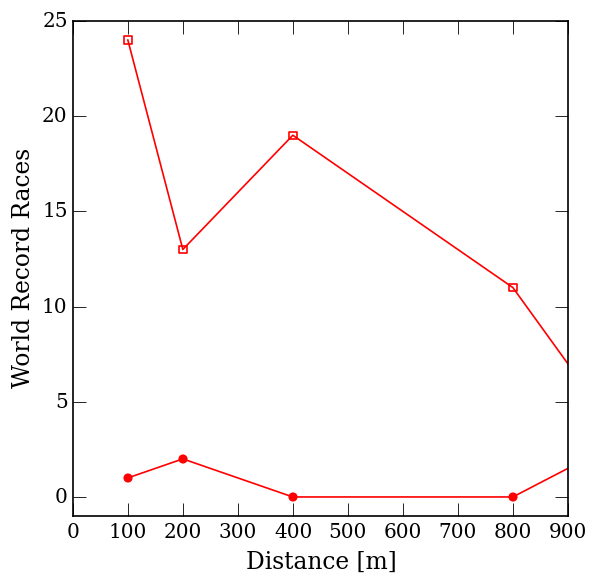

In [34]:
plot(distance[(frecords_long==1.0)*(mrecords_long==1.0)], 
     frecords_before_88[[(frecords_long==1.0)*(mrecords_long==1.0)]],'r-')
plot(distance[(frecords_long==1.0)*(mrecords_long==1.0)], 
     frecords_after_88[[(frecords_long==1.0)*(mrecords_long==1.0)]],'r-')
for i in arange(distance.size/2)[(frecords_long==1.0)*(mrecords_long==1.0)]:
    #print Ndistance[i]
    scatter(distance[i],frecords_after_88[i],color='r')

    scatter(distance[i],frecords_before_88[i],color='None',marker='s',edgecolor='r')
    xlim(0,900)
    ylim(-1,25)
    xlabel('Distance [m]')
    ylabel('World Record Races')

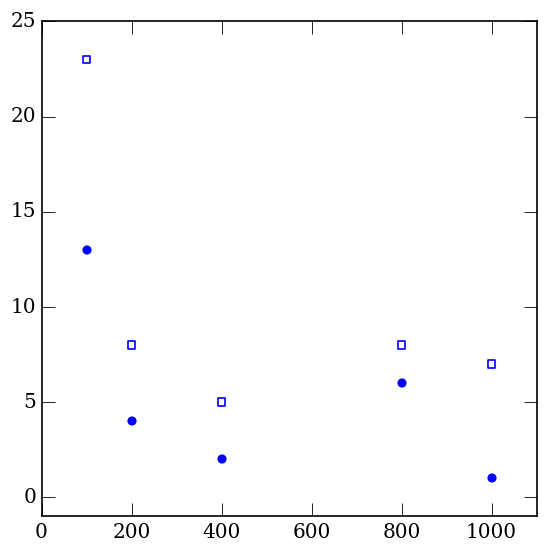

In [35]:
for i in arange(distance.size/2)[(frecords_long==1.0)*(mrecords_long==1.0)]:
    #print Ndistance[i]
    scatter(distance[i],mrecords_after_88[i],color='b')
    scatter(distance[i],mrecords_before_88[i],color='None',marker='s',edgecolor='b')
    xlim(0,1100)
    ylim(-1,25)

In [350]:
mean(frecords_after_88)

4.0

In [336]:
frecords_before_88

array([ 24.,  13.,  19.,  11.,   3.,  12.,  11.,   2.,   6.,   6.,  11.,
        10.,  12.,  12.,  23.])

In [334]:
mean(frecords_before_88)

11.666666666666666

In [329]:
mean(mrecords_after_88)

5.9333333333333336